In [3]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory
import matplotlib.pyplot as plt
import seaborn as sns
import datetime as dt
import pandas_datareader.data as web
import sklearn

plot_params = dict(
    color="0.75",
    style=".-",
    markeredgecolor="0.25",
    markerfacecolor="0.25",
    legend=False,
)

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/netflix-stock-data-from-2002-to-2021/NFLX.csv


In [4]:
pip install pandas_datareader

Note: you may need to restart the kernel to use updated packages.


In [5]:
df = pd.read_csv('/kaggle/input/netflix-stock-data-from-2002-to-2021/NFLX.csv',parse_dates=['Date'])

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4874 entries, 0 to 4873
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype         
---  ------     --------------  -----         
 0   Date       4874 non-null   datetime64[ns]
 1   Open       4874 non-null   float64       
 2   High       4874 non-null   float64       
 3   Low        4874 non-null   float64       
 4   Close      4874 non-null   float64       
 5   Adj Close  4874 non-null   float64       
 6   Volume     4874 non-null   int64         
dtypes: datetime64[ns](1), float64(5), int64(1)
memory usage: 266.7 KB


Inference: There are 7 columns namely - Date of type object, Open, High, Low, Close, Adj Close and Volume all of type float, and 4874 stocks. Also, there are zero null entries

## MODULE 1: EXPLORATORY DATA ANALYSIS

In [7]:
df.describe()

,Open,High,Low,Close,Adj Close,Volume
count,4874.000000,4874.000000,4874.000000,4874.000000,4874.000000,4.874000e+03
mean,104.644811,106.243736,103.006660,104.686524,104.686524,1.681687e+07
std,155.886656,158.173217,153.546958,155.940368,155.940368,1.937625e+07
min,0.377857,0.410714,0.346429,0.372857,0.372857,2.856000e+05
25%,3.901429,3.977143,3.835357,3.905714,3.905714,6.301225e+06
50%,21.386429,21.816429,20.935714,21.233572,21.233572,1.084630e+07
75%,125.445000,126.592499,122.987499,125.097502,125.097502,2.016192e+07
max,608.049988,619.000000,608.049988,610.340027,610.340027,3.234140e+08


Inference: -

1. Highest opening price of the stock was 608.04 while lowest was 0.377

2. Highest closing price of the stock was 610.34 while lowest was 0.372

3. Highest price of the stock in that period was 619.00

4. Lowest price of the stock was in that year was 0.34

5. Highest volume of the stocks sold in a day was 323,414,000 while lowest was 285,600

6. Average opening price of that year was 104.64

7. Average closing price of that year was 104.68

8. Highest adjusted price in a day was 610.34

In [8]:
for col in df.columns:
    print(df[[col]].nunique(),'\n')

Date    4874
dtype: int64 

Open    4345
dtype: int64 

High    4322
dtype: int64 

Low    4310
dtype: int64 

Close    4408
dtype: int64 

Adj Close    4408
dtype: int64 

Volume    4734
dtype: int64 



### DATA VISUALIZATION

**SCATTER PLOTS**

Trend of Open Stock Price


<Figure size 2000x500 with 0 Axes>

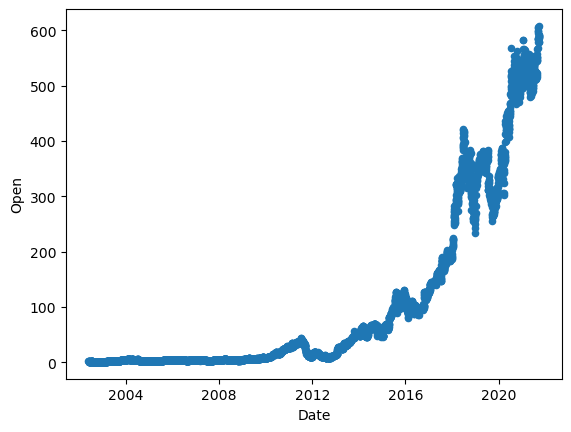

Trend of Close Stock Price


<Figure size 2000x500 with 0 Axes>

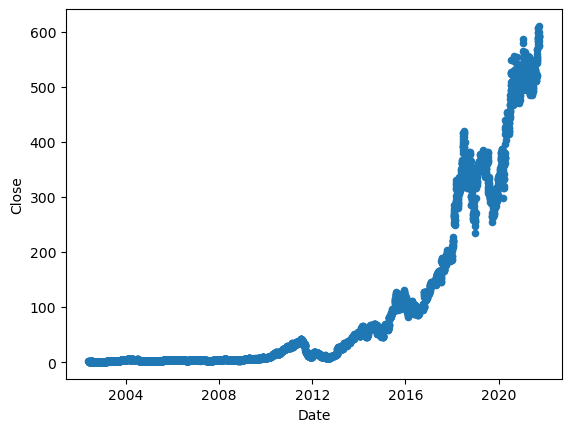

Trend of Adj Close Stock Price


<Figure size 2000x500 with 0 Axes>

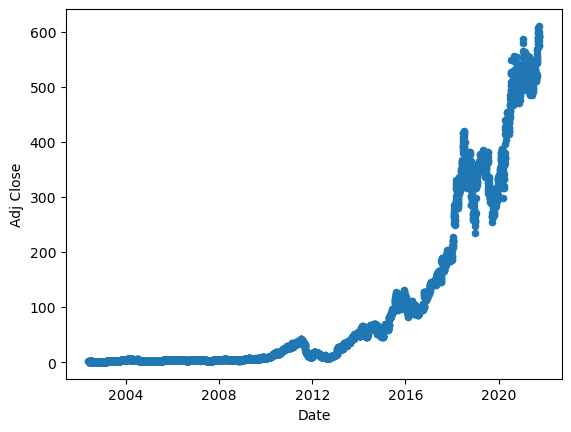

Trend of High Stock Price


<Figure size 2000x500 with 0 Axes>

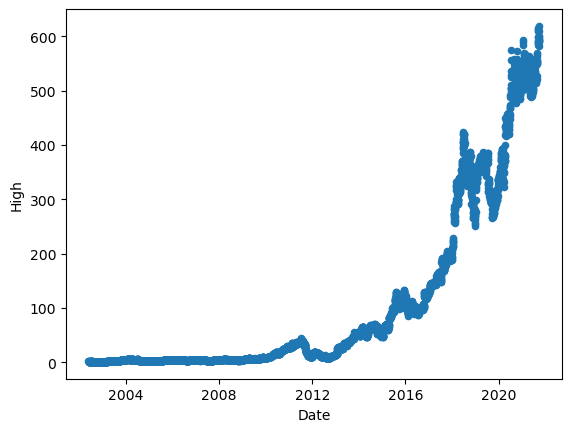

Trend of Low Stock Price


<Figure size 2000x500 with 0 Axes>

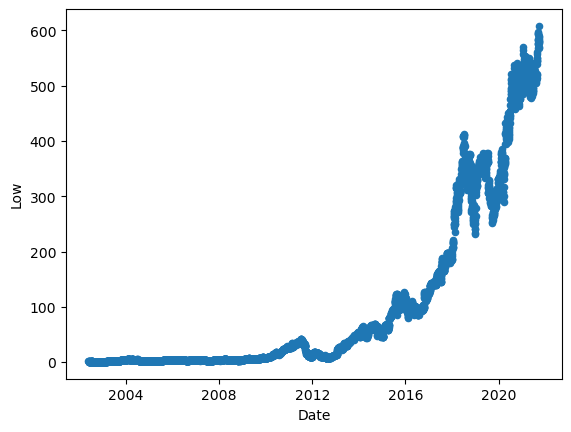

Trend of Volume Stock Price


<Figure size 2000x500 with 0 Axes>

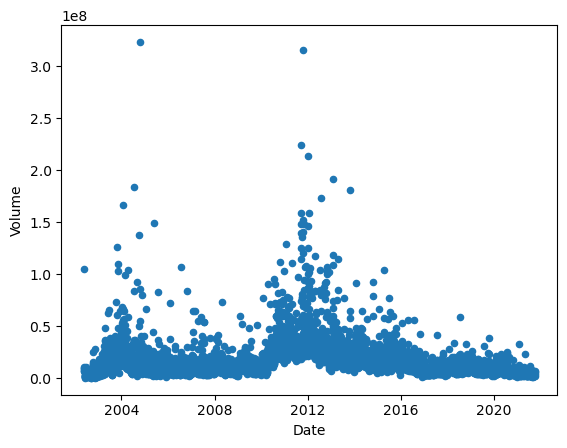

In [9]:
col = ['Open','Close','Adj Close','High','Low','Volume']
for i in range(len(col)):
    print('Trend of '+col[i]+' Stock Price')
    plt.figure(figsize=(20,5))
    df.plot.scatter(x='Date',y=col[i])
    plt.show()

**LINE PLOT**

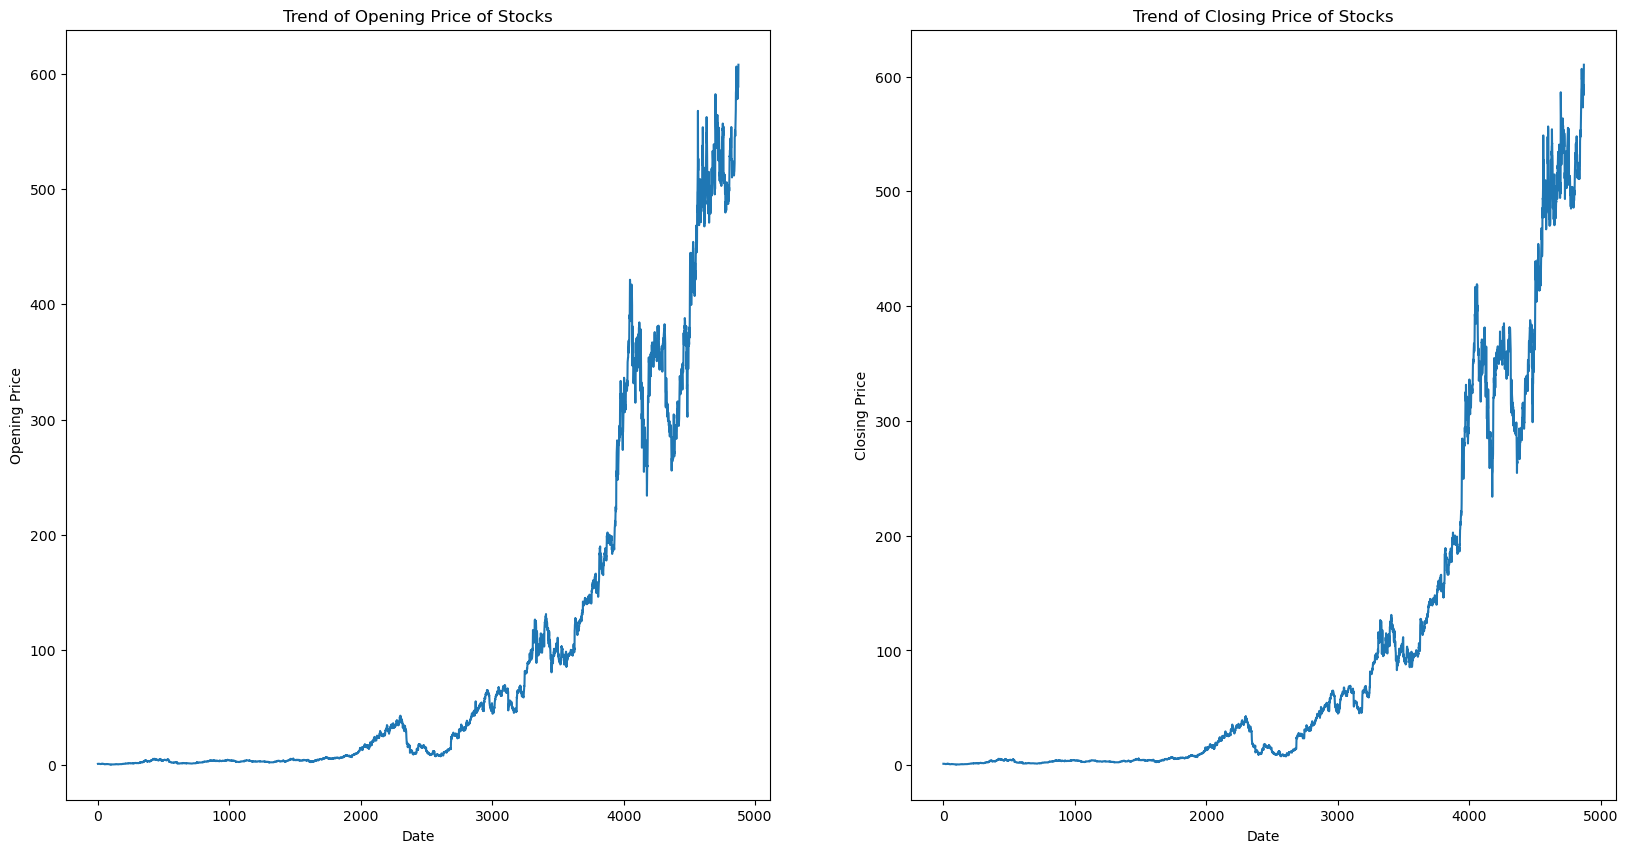

In [10]:
fig,ax=plt.subplots(nrows=1,ncols=2,figsize=(20,10)) 
ax[0].plot(df['Open']) 
ax[0].set_xlabel('Date') 
ax[0].set_ylabel('Opening Price') 
ax[0].set_title('Trend of Opening Price of Stocks') 

ax[1].plot(df['Close']) 
ax[1].set_xlabel('Date') 
ax[1].set_ylabel('Closing Price') 
ax[1].set_title('Trend of Closing Price of Stocks') 

plt.show()

In [13]:
df['Year'] = df['Date'].dt.strftime('%Y')
df['Month'] = df['Date'].dt.strftime('%m')
df['Day'] = df['Date'].dt.strftime('%d')
df

,Date,Open,High,Low,Close,Adj Close,Volume,Year,Month,Day
0,2002-05-23,1.156429,1.242857,1.145714,1.196429,1.196429,104790000,2002,05,23
1,2002-05-24,1.214286,1.225000,1.197143,1.210000,1.210000,11104800,2002,05,24
2,2002-05-28,1.213571,1.232143,1.157143,1.157143,1.157143,6609400,2002,05,28
3,2002-05-29,1.164286,1.164286,1.085714,1.103571,1.103571,6757800,2002,05,29
4,2002-05-30,1.107857,1.107857,1.071429,1.071429,1.071429,10154200,2002,05,30
...,...,...,...,...,...,...,...,...,...,...
4869,2021-09-24,592.500000,592.979980,583.640015,592.390015,592.390015,2124800,2021,09,24
4870,2021-09-27,587.950012,593.580017,576.929993,592.640015,592.640015,2504700,2021,09,27
4871,2021-09-28,589.000000,599.539978,580.159973,583.849976,583.849976,4431100,2021,09,28
4872,2021-09-29,589.010010,609.880005,588.010010,599.059998,599.059998,6221000,2021,09,29


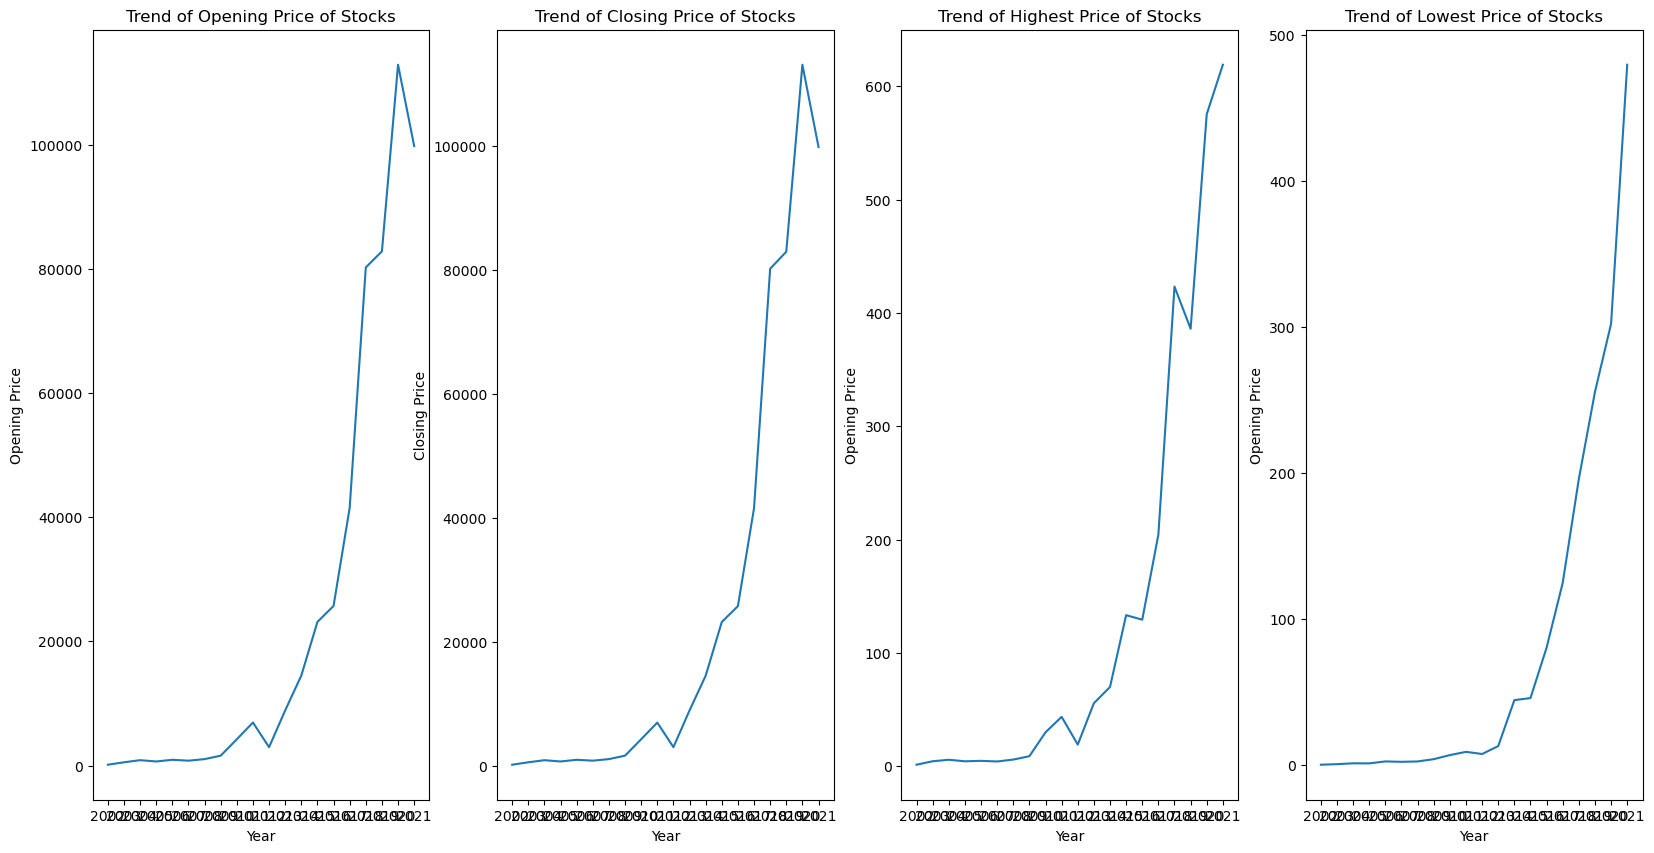

In [17]:
#Yearly trends 
fig,ax=plt.subplots(nrows=1,ncols=4,figsize=(20,10)) 
ax[0].plot(df.groupby('Year')['Open'].sum()) 
ax[0].set_xlabel('Year') 
ax[0].set_ylabel('Opening Price') 
ax[0].set_title('Trend of Opening Price of Stocks') 

ax[1].plot(df.groupby('Year')['Close'].sum()) 
ax[1].set_xlabel('Year') 
ax[1].set_ylabel('Closing Price') 
ax[1].set_title('Trend of Closing Price of Stocks') 

ax[2].plot(df.groupby('Year')['High'].max()) 
ax[2].set_xlabel('Year') 
ax[2].set_ylabel('Opening Price') 
ax[2].set_title('Trend of Highest Price of Stocks') 

ax[3].plot(df.groupby('Year')['Open'].min()) 
ax[3].set_xlabel('Year') 
ax[3].set_ylabel('Opening Price') 
ax[3].set_title('Trend of Lowest Price of Stocks') 

plt.show()

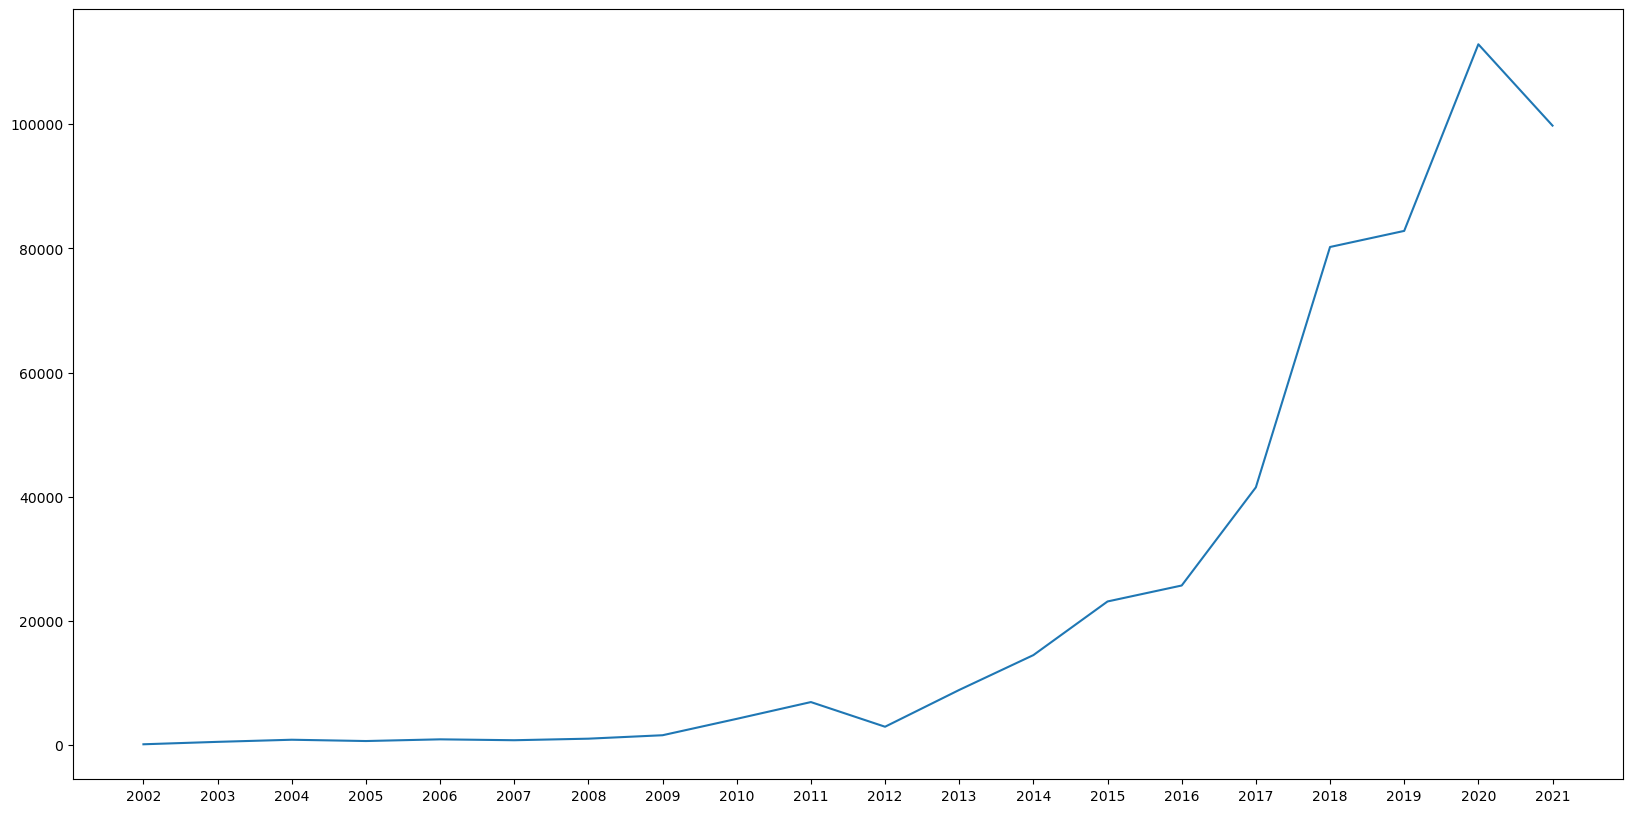

In [18]:
#Opening Price
plt.figure(figsize=(20,10))
plt.plot(df.groupby('Year')['Open'].sum()) 
plt.xlabel='Year'
plt.ylabel='Opening Price'
plt.title='Trend of Opening Price of Stocks'
plt.show()

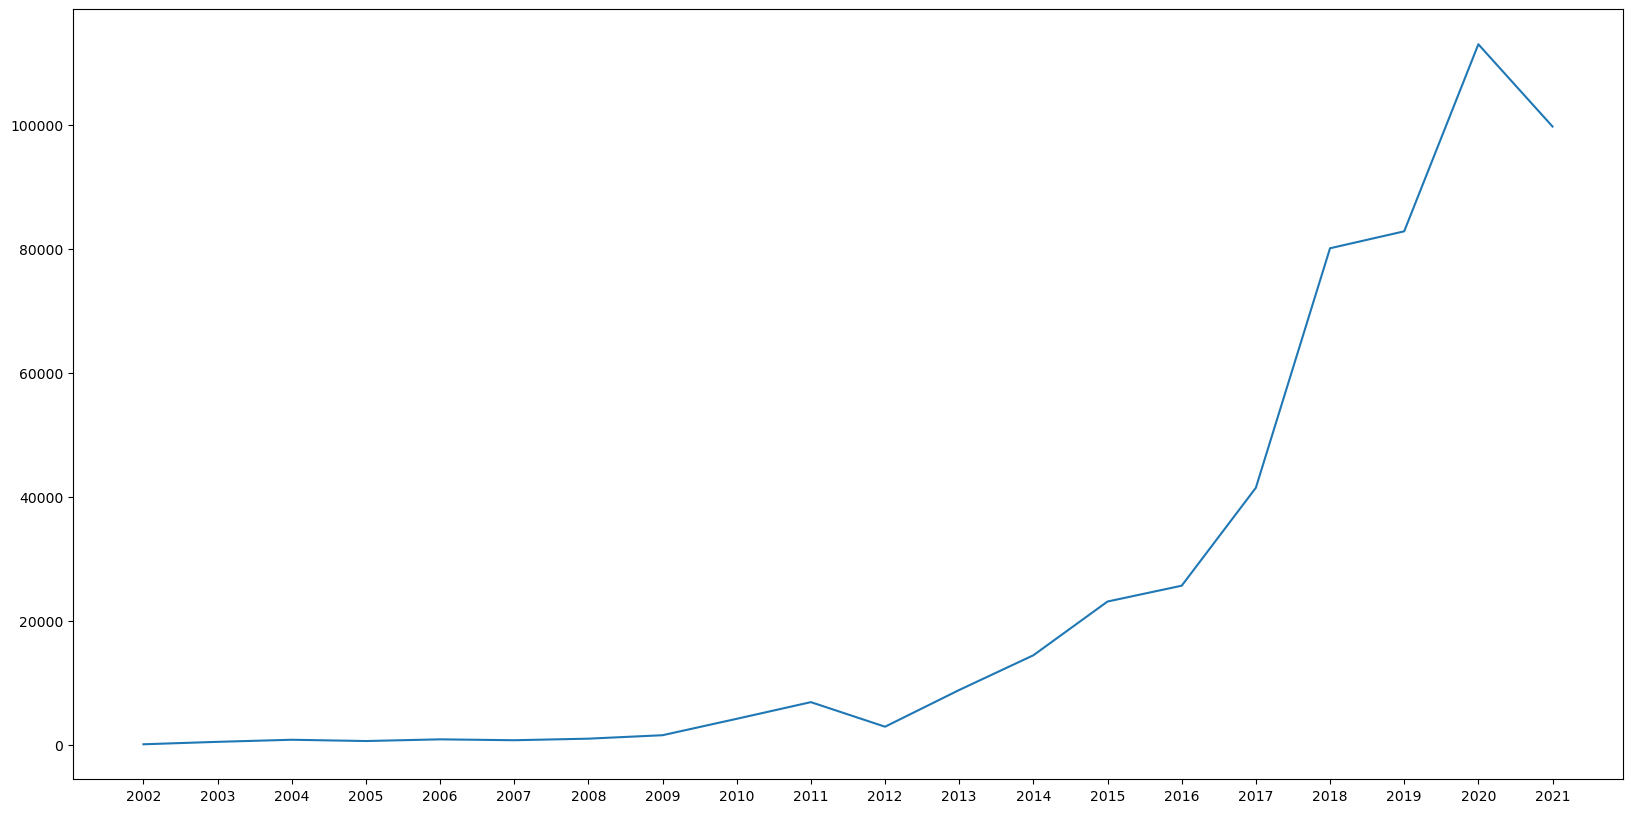

In [19]:
#Closing Price
plt.figure(figsize=(20,10))
plt.plot(df.groupby('Year')['Close'].sum()) 
plt.xlabel = 'Year'
plt.ylabel = 'Closing Price'
plt.title = 'Trend of Closing Price of Stocks'
plt.show()

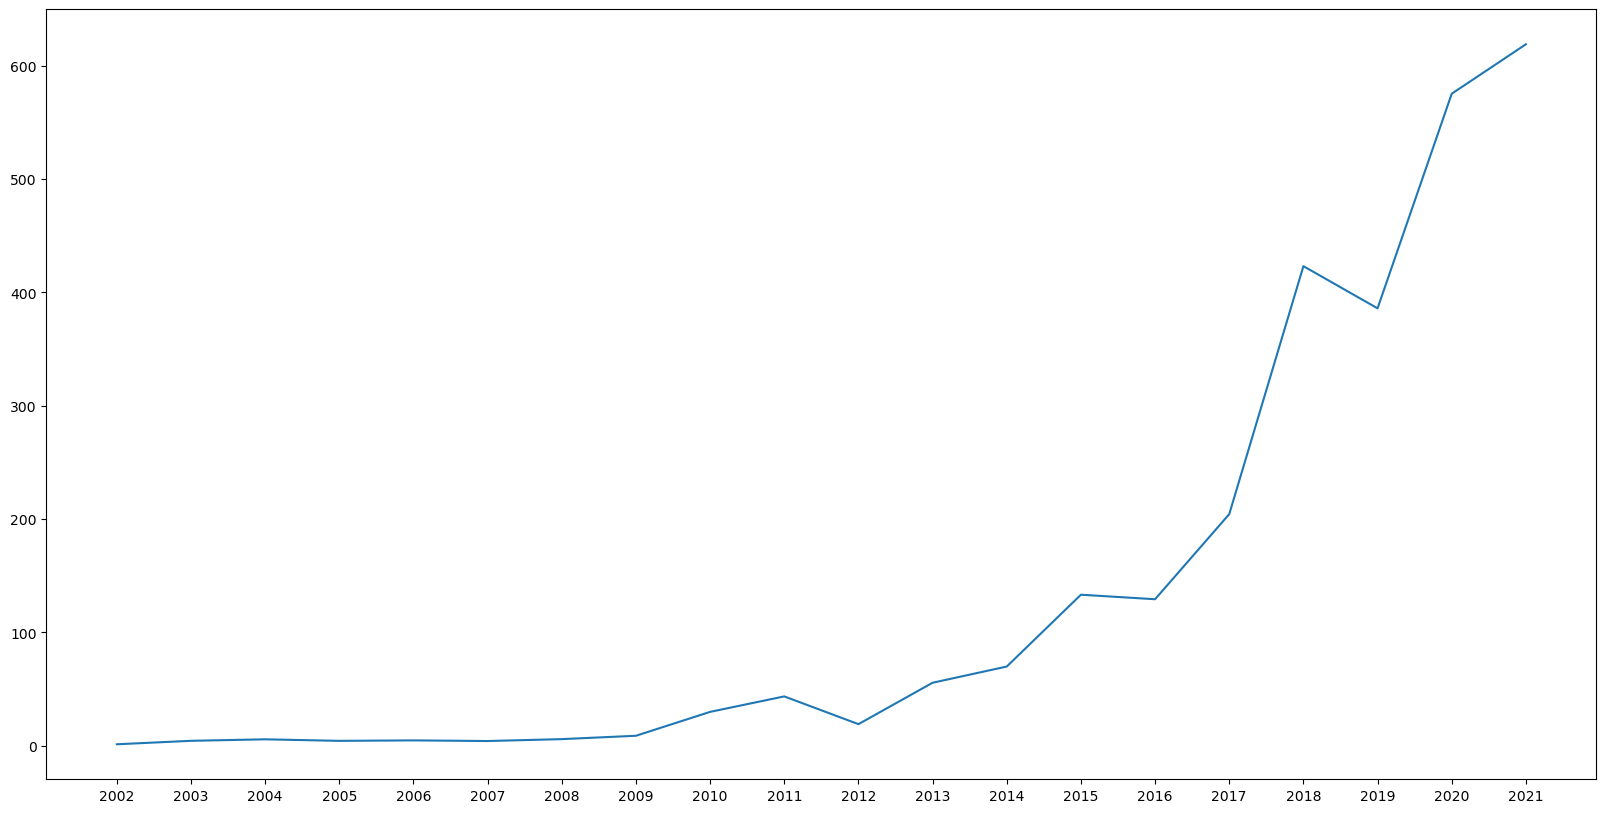

In [20]:
#Highest Price
plt.figure(figsize=(20,10))
plt.plot(df.groupby('Year')['High'].max()) 
plt.xlabel = 'Year' 
plt.ylabel = 'Highest Price'
plt.title = 'Trend of Highest Price of Stocks'
plt.show()

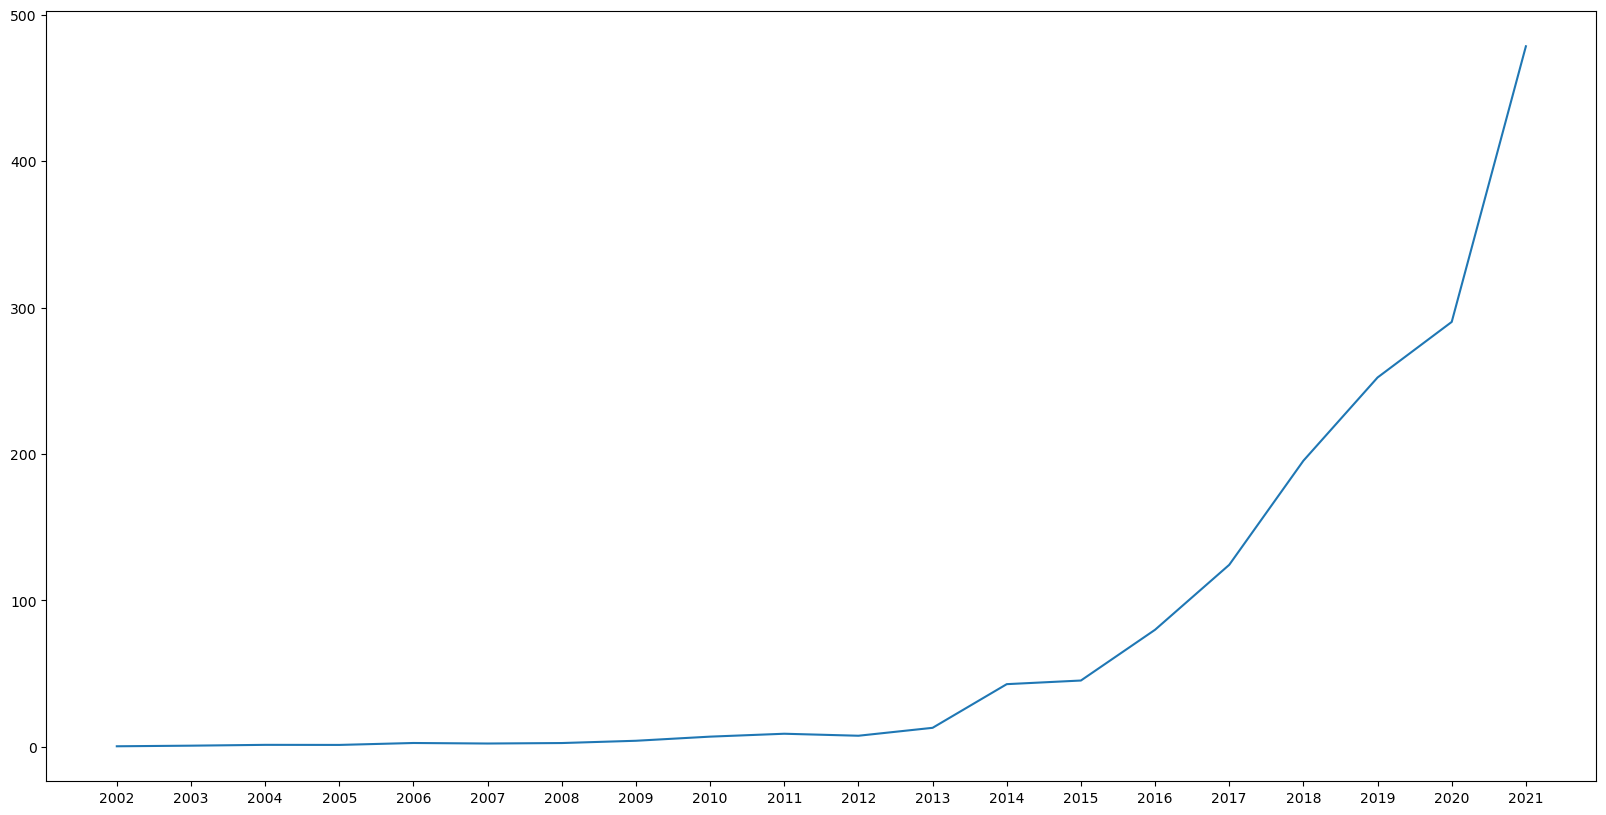

In [21]:
#Lowest Price
plt.figure(figsize=(20,10))
plt.plot(df.groupby('Year')['Low'].min()) 
plt.xlabel = 'Year'
plt.ylabel = 'Lowest Price'
plt.title = 'Trend of Lowest Price of Stocks'
plt.show()

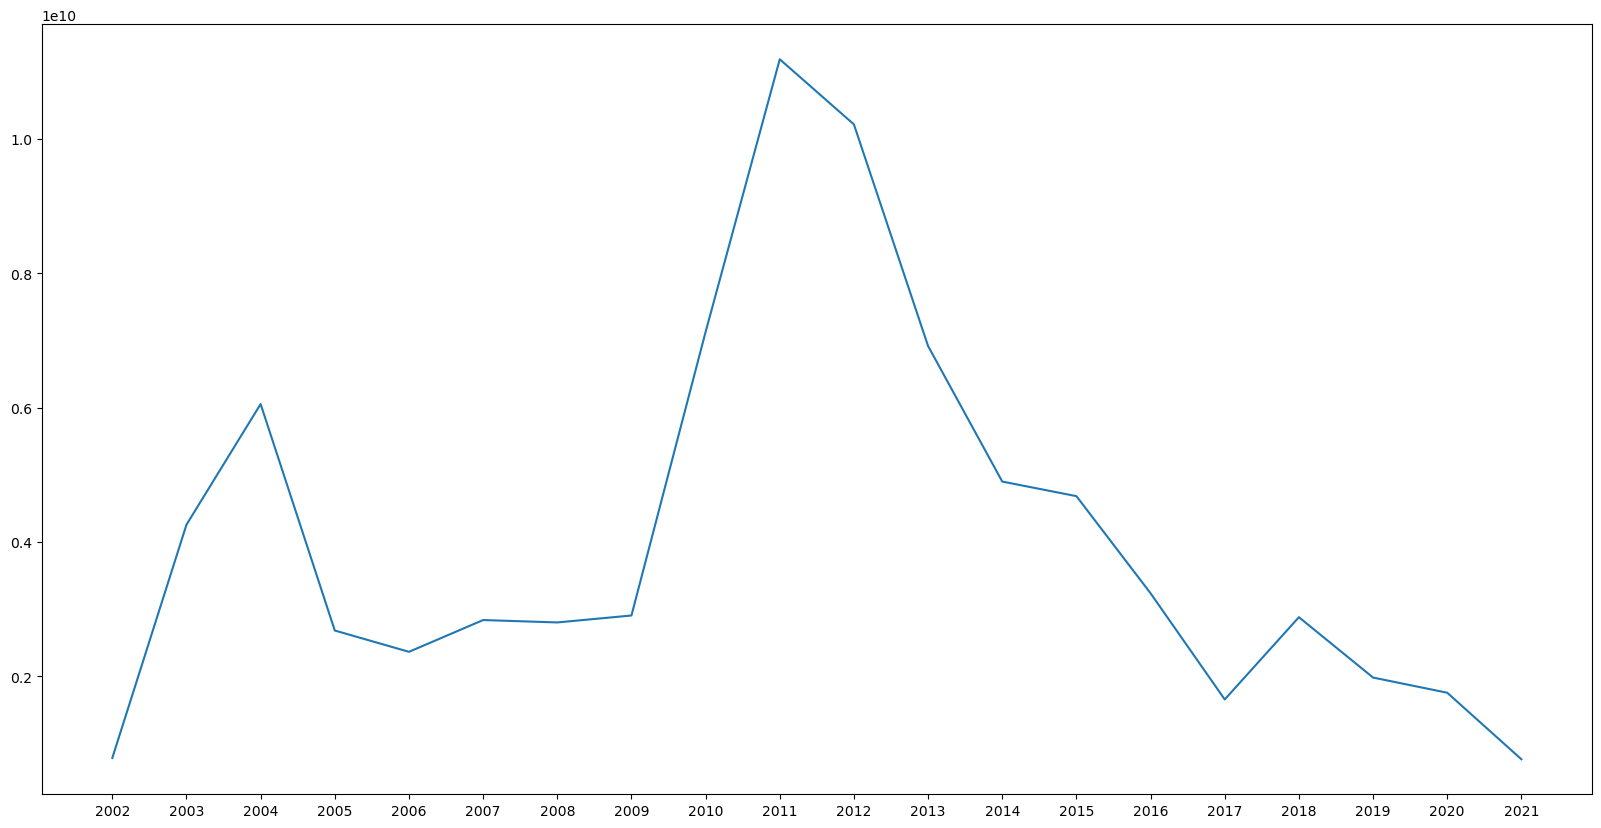

In [22]:
#Volume of stocks
plt.figure(figsize=(20,10))
plt.plot(df.groupby('Year')['Volume'].sum()) 
plt.xlabel = 'Year'
plt.ylabel = 'Opening Price'
plt.title = 'Trend of Volume of Stocks Sold across years'
plt.show()

**Yearly Trends**

/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:5: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  """


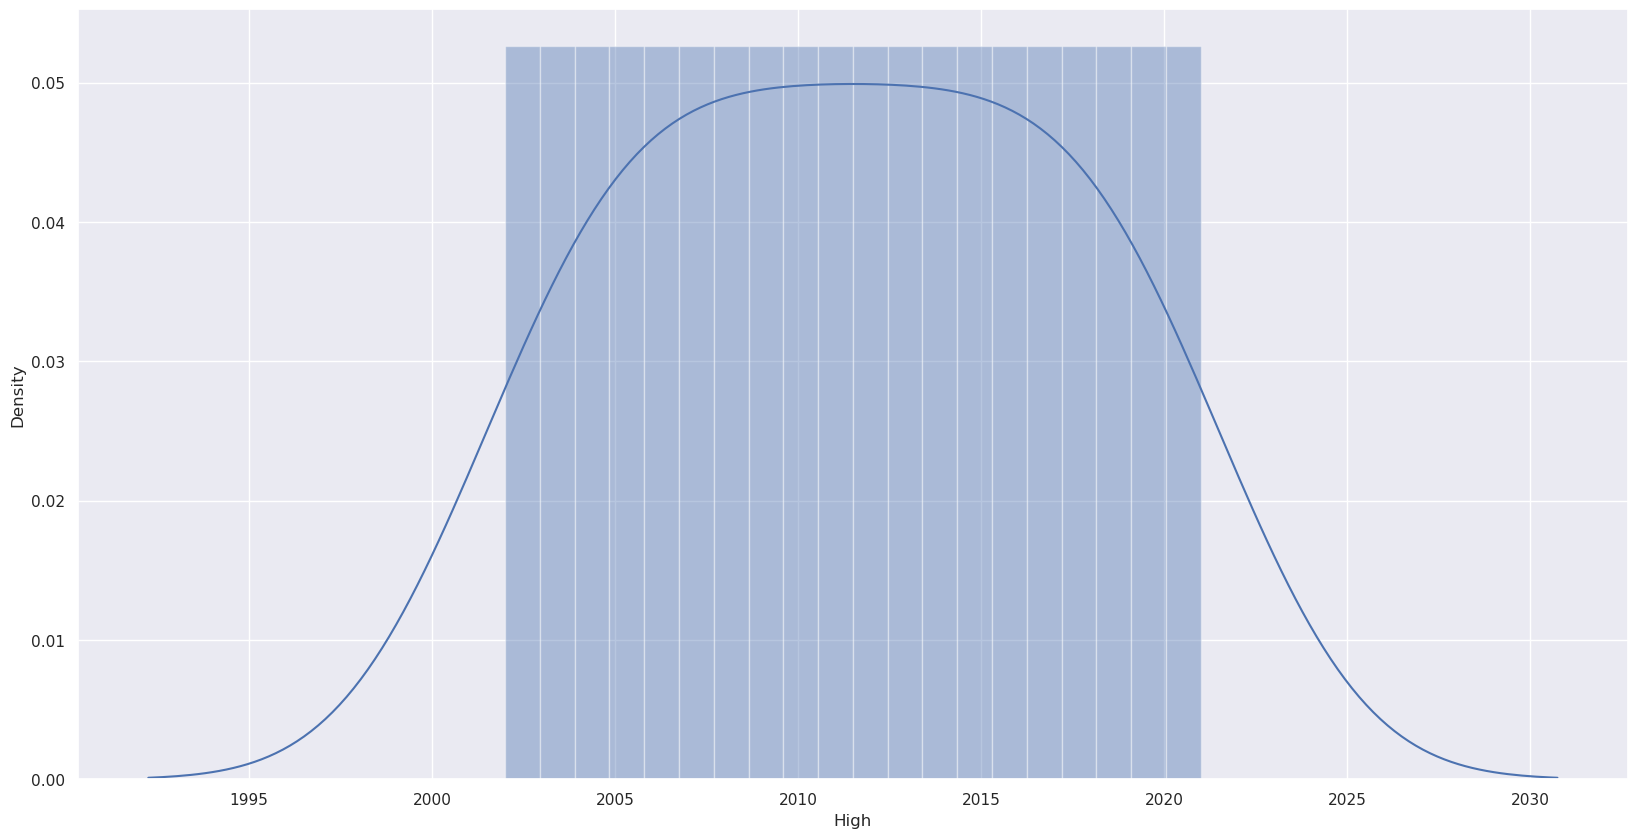

In [24]:
X=df['Year'].unique()
#Opening Price
plt.figure(figsize=(20,10))
sns.set(style="darkgrid")
sns.distplot(df.groupby('Year')['High'].max(), x=X, bins=20)
# plt.scatter(x = X,y = df.groupby('Year')['Open'].sum()) 
# plt.xlabel('Year') 
# plt.ylabel('Opening Price') 
plt.title = 'Trend of Opening Price of Stocks'
plt.show()

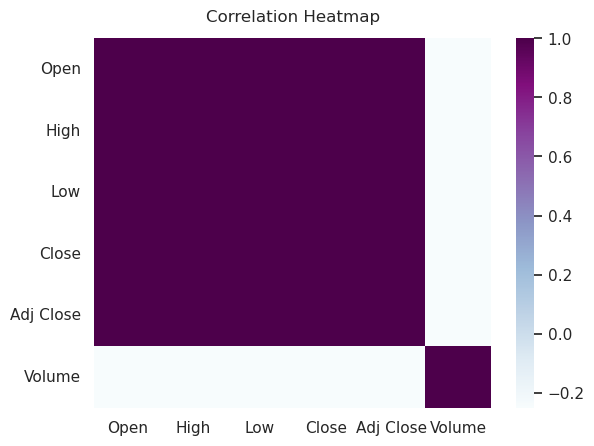

<Figure size 2000x1000 with 0 Axes>

In [25]:
#CORRELATION
heatmap = sns.heatmap(df.corr(), cmap='BuPu')
plt.figure(figsize=(20,10))
heatmap.set_title('Correlation Heatmap', fontdict={'fontsize':12}, pad=12);
plt.savefig('heatmap.png', dpi=300, bbox_inches='tight')

## MODULE 2: REGRESSION ANALYSIS

In [26]:
#CALCULATION OF COVARIANCE OF OPENING AND CLOSING PRICES
df1 = df.loc[:,['Date','Open','Close']]
df1 = df1.set_index(df1.Date,drop=True).drop('Date',axis=1)
print(df1)
print('Variance\n',df1.var())
print('\nCovariance\n',df1.cov())

                  Open       Close
Date                              
2002-05-23    1.156429    1.196429
2002-05-24    1.214286    1.210000
2002-05-28    1.213571    1.157143
2002-05-29    1.164286    1.103571
2002-05-30    1.107857    1.071429
...                ...         ...
2021-09-24  592.500000  592.390015
2021-09-27  587.950012  592.640015
2021-09-28  589.000000  583.849976
2021-09-29  589.010010  599.059998
2021-09-30  608.049988  610.340027

[4874 rows x 2 columns]
Variance
 Open     24300.649565
Close    24317.398397
dtype: float64

Covariance
                Open         Close
Open   24300.649565  24301.921971
Close  24301.921971  24317.398397


In [27]:
#Calculation of Correlation of Coefficient
r = df1.Open.cov(df1.Close) / (df1.Open.std() * df1.Close.std())
print('Correlation Coefficient\n',r)

Correlation Coefficient
 0.9997079040274446


A Correlation coefficient of 0.9997 which is closer to 1 indicates that the Opening and Closing prices of stocks have an almost perfect positive correlation.

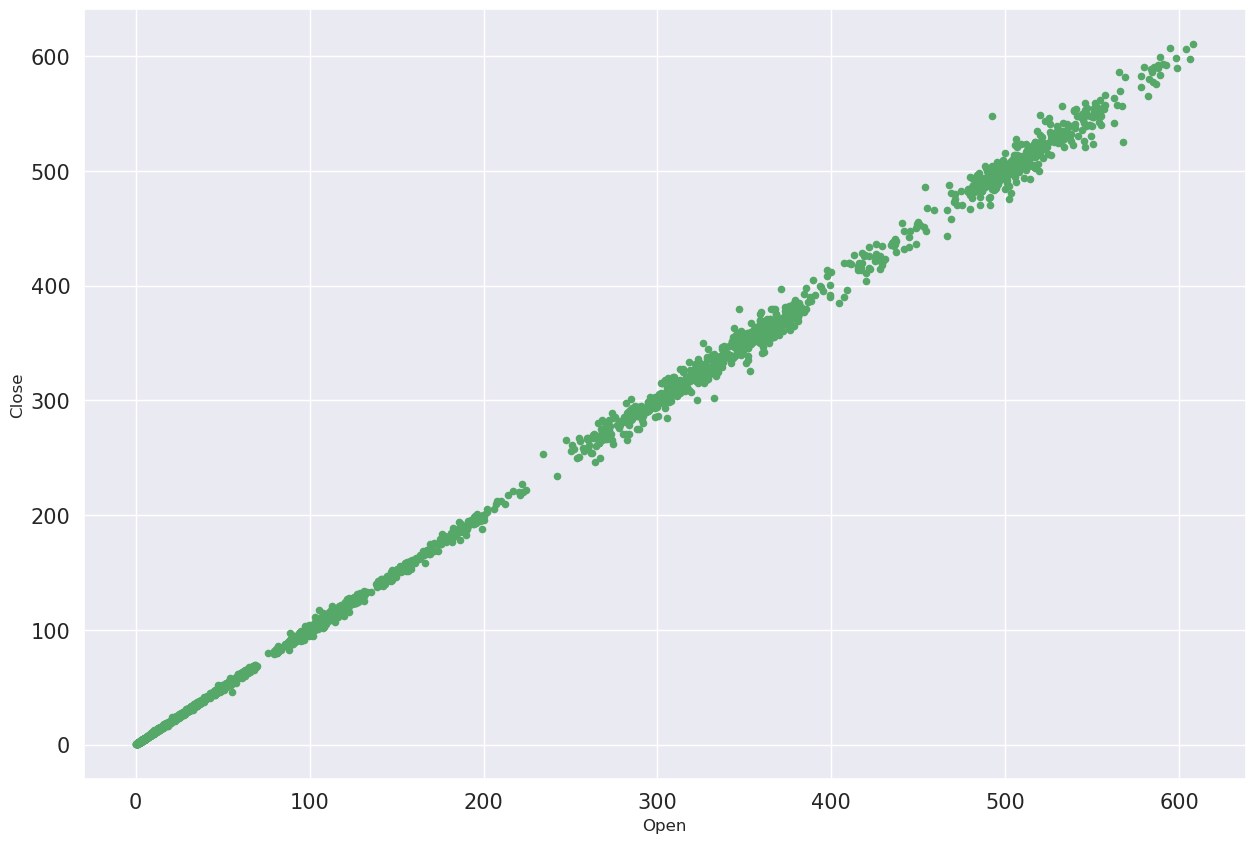

In [28]:
#Scatter plot to show the relationship between Opening and Closing Prices
df1.plot(kind='scatter',x='Open',y='Close',color='C2',figsize=(15,10),fontsize=15)
plt.xlabel='Opening Stock Price in USD'
plt.ylabel='Closing Stock Price in USD'
plt.title='Relationship between Opening and Closing Stock Price'
plt.show()

**SIMPLE LINEAR REGRESSION**

In [30]:
!pip install yfinance

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 59.2/59.2 kB 3.7 MB/s eta 0:00:00


In [31]:
import yfinance as yf
from sklearn.linear_model import LinearRegression

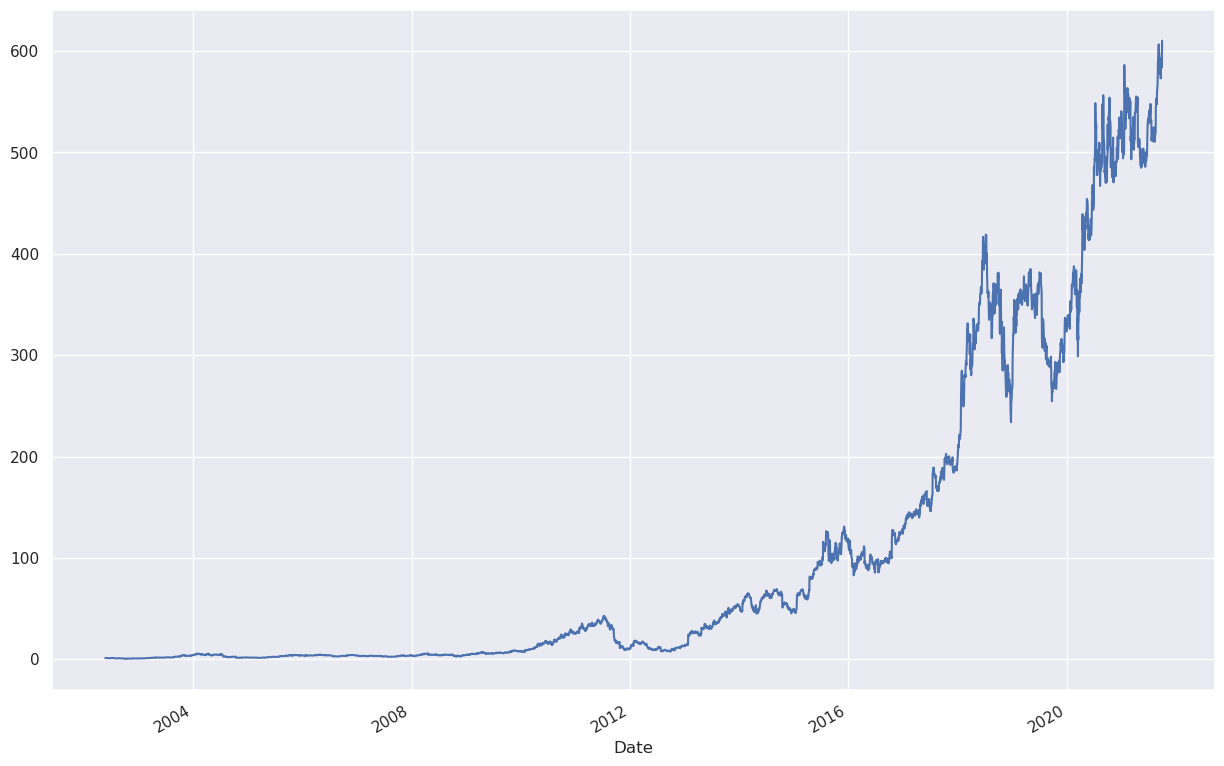

In [32]:
plt.figure(figsize=(15,10))
df1['Close'].plot()
plt.title = "Stock Price"
plt.ylabel='Closing Price'
plt.xlabel='Time'
plt.plot(which="major", color='k')
plt.show()

In [33]:
df1 = df1.to_period('D')
#Insert Time interval from Date
df1['Time'] = np.arange(len(df1.index))

In [34]:
x = df1.loc[:,['Time']] #Feature
y = df1.loc[:,'Close']      # Target Variable

In [35]:
#Simple Linear Regression
linreg = LinearRegression().fit(x,y)
predictions = pd.Series(linreg.predict(x), index=x.index) 
score = linreg.score(x,y)

In [36]:
print(score)
print(predictions)

0.6579307301094198
Date
2002-05-23   -114.329357
2002-05-24   -114.239467
2002-05-28   -114.149578
2002-05-29   -114.059688
2002-05-30   -113.969799
                 ...    
2021-09-24    323.342847
2021-09-27    323.432737
2021-09-28    323.522626
2021-09-29    323.612516
2021-09-30    323.702405
Freq: D, Length: 4874, dtype: float64


Text(0.5, 1.0, 'Time Plot of Stock Prices')

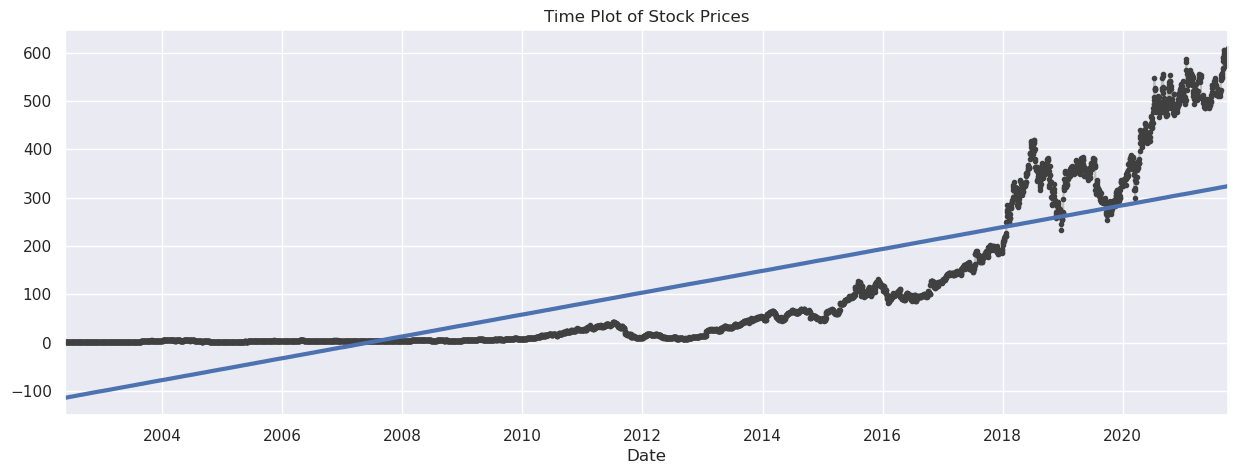

In [38]:
#plotting the Regression line and the actual predictions
plt.figure(figsize=(15,5))
# plt.scatter(df1.index,df1['Close'],color='g')
# plt.plot(df1.index, predictions)
# plt.show()
ax = y.plot(**plot_params)
ax = predictions.plot(ax = ax, linewidth=3)
ax.set_title('Time Plot of Stock Prices')

**LAG PERIODS 1 to 7**

In [39]:
#USING LAG FEATURE
df1['Lag_1'] = df1['Close'].shift(1)
df1['Lag_1'] = df1['Close'].shift(1)
df1['Lag_2'] = df1['Close'].shift(2)
df1['Lag_3'] = df1['Close'].shift(3)
df1['Lag_4'] = df1['Close'].shift(4)
df1['Lag_5'] = df1['Close'].shift(5)
df1['Lag_6'] = df1['Close'].shift(6)
df1['Lag_7'] = df1['Close'].shift(7)
df1.head()

,Open,Close,Time,Lag_1,Lag_2,Lag_3,Lag_4,Lag_5,Lag_6,Lag_7
Date,,,,,,,,,,
2002-05-23,1.156429,1.196429,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2002-05-24,1.214286,1.210000,1,1.196429,NaN,NaN,NaN,NaN,NaN,NaN
2002-05-28,1.213571,1.157143,2,1.210000,1.196429,NaN,NaN,NaN,NaN,NaN
2002-05-29,1.164286,1.103571,3,1.157143,1.210000,1.196429,NaN,NaN,NaN,NaN
2002-05-30,1.107857,1.071429,4,1.103571,1.157143,1.210000,1.196429,NaN,NaN,NaN


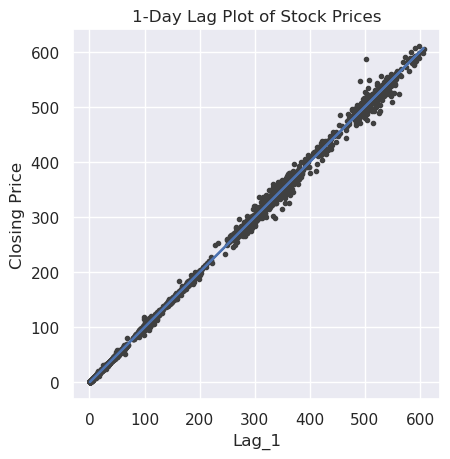

In [42]:
X = df1.loc[:, ['Lag_1']]
X.dropna(inplace=True)  # drop missing values in the feature set
y = df1.loc[:, 'Close']  # create the target
y, X = y.align(X, join='inner')  # drop corresponding values in target

linreg = LinearRegression()
linreg.fit(X, y)

pred = pd.Series(linreg.predict(X), index=X.index)

#Plots
fig, ax = plt.subplots()
ax.plot(X['Lag_1'], y, '.', color='0.25')
ax.plot(X['Lag_1'], pred)
ax.set_aspect('equal')
ax.set_ylabel('Closing Price')
ax.set_xlabel('Lag_1')
ax.set_title('1-Day Lag Plot of Stock Prices');

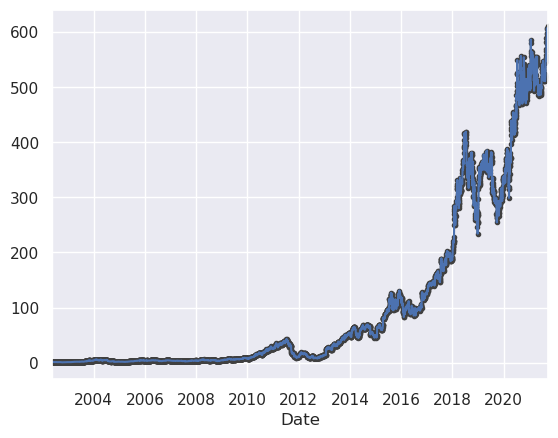

In [43]:
ax = y.plot(**plot_params)
ax = pred.plot()

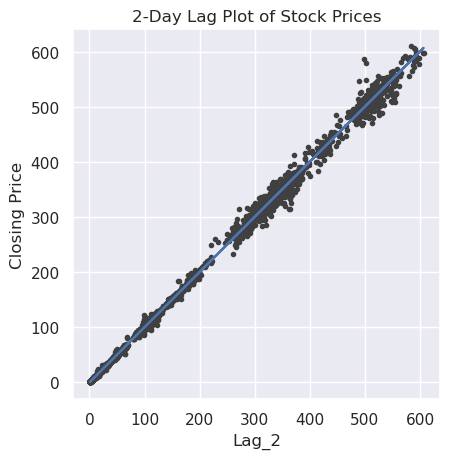

In [44]:
X = df1.loc[:, ['Lag_2']]
X.dropna(inplace=True)  # drop missing values in the feature set
y = df1.loc[:, 'Close']  # create the target
y, X = y.align(X, join='inner')  # drop corresponding values in target

linreg = LinearRegression()
linreg.fit(X, y)

pred = pd.Series(linreg.predict(X), index=X.index)

#Plots
fig, ax = plt.subplots()
ax.plot(X['Lag_2'], y, '.', color='0.25')
ax.plot(X['Lag_2'], pred)
ax.set_aspect('equal')
ax.set_ylabel('Closing Price')
ax.set_xlabel('Lag_2')
ax.set_title('2-Day Lag Plot of Stock Prices');

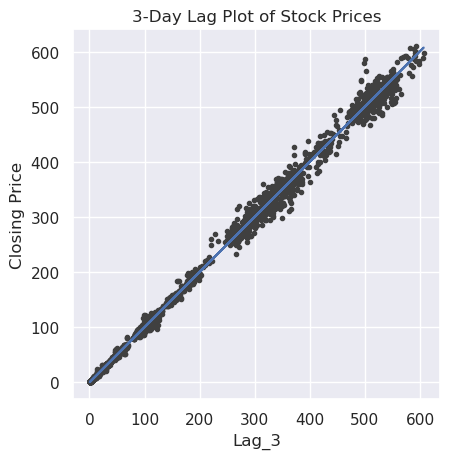

In [45]:
X = df1.loc[:, ['Lag_3']]
X.dropna(inplace=True)  # drop missing values in the feature set
y = df1.loc[:, 'Close']  # create the target
y, X = y.align(X, join='inner')  # drop corresponding values in target

linreg = LinearRegression()
linreg.fit(X, y)

pred = pd.Series(linreg.predict(X), index=X.index)

#Plots
fig, ax = plt.subplots()
ax.plot(X['Lag_3'], y, '.', color='0.25')
ax.plot(X['Lag_3'], pred)
ax.set_aspect('equal')
ax.set_ylabel('Closing Price')
ax.set_xlabel('Lag_3')
ax.set_title('3-Day Lag Plot of Stock Prices');

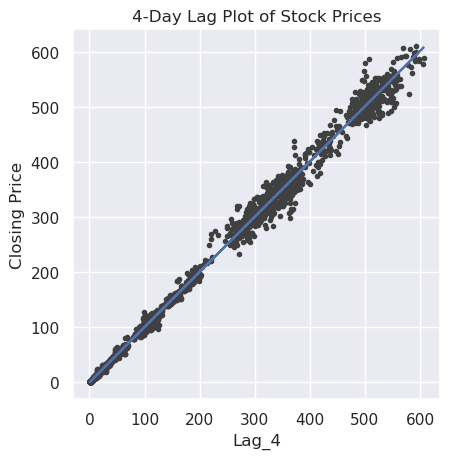

In [46]:
X = df1.loc[:, ['Lag_4']]
X.dropna(inplace=True)  # drop missing values in the feature set
y = df1.loc[:, 'Close']  # create the target
y, X = y.align(X, join='inner')  # drop corresponding values in target

linreg = LinearRegression()
linreg.fit(X, y)

pred = pd.Series(linreg.predict(X), index=X.index)

#Plots
fig, ax = plt.subplots()
ax.plot(X['Lag_4'], y, '.', color='0.25')
ax.plot(X['Lag_4'], pred)
ax.set_aspect('equal')
ax.set_ylabel('Closing Price')
ax.set_xlabel('Lag_4')
ax.set_title('4-Day Lag Plot of Stock Prices');

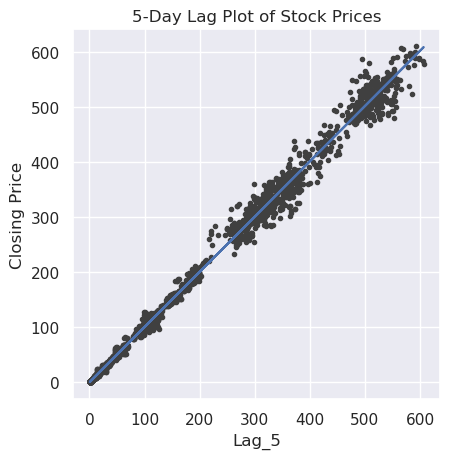

In [47]:
X = df1.loc[:, ['Lag_5']]
X.dropna(inplace=True)  # drop missing values in the feature set
y = df1.loc[:, 'Close']  # create the target
y, X = y.align(X, join='inner')  # drop corresponding values in target

linreg = LinearRegression()
linreg.fit(X, y)

pred = pd.Series(linreg.predict(X), index=X.index)

#Plots
fig, ax = plt.subplots()
ax.plot(X['Lag_5'], y, '.', color='0.25')
ax.plot(X['Lag_5'], pred)
ax.set_aspect('equal')
ax.set_ylabel('Closing Price')
ax.set_xlabel('Lag_5')
ax.set_title('5-Day Lag Plot of Stock Prices');

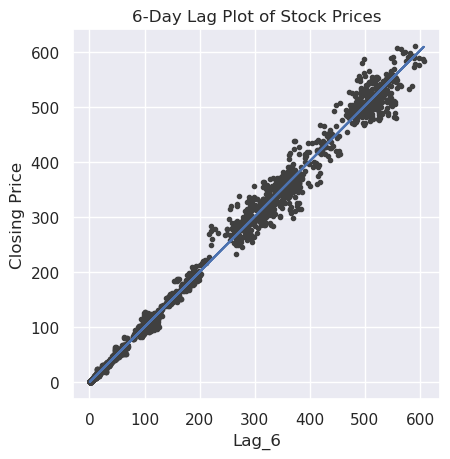

In [48]:
X = df1.loc[:, ['Lag_6']]
X.dropna(inplace=True)  # drop missing values in the feature set
y = df1.loc[:, 'Close']  # create the target
y, X = y.align(X, join='inner')  # drop corresponding values in target

linreg = LinearRegression()
linreg.fit(X, y)

pred = pd.Series(linreg.predict(X), index=X.index)

#Plots
fig, ax = plt.subplots()
ax.plot(X['Lag_6'], y, '.', color='0.25')
ax.plot(X['Lag_6'], pred)
ax.set_aspect('equal')
ax.set_ylabel('Closing Price')
ax.set_xlabel('Lag_6')
ax.set_title('6-Day Lag Plot of Stock Prices');

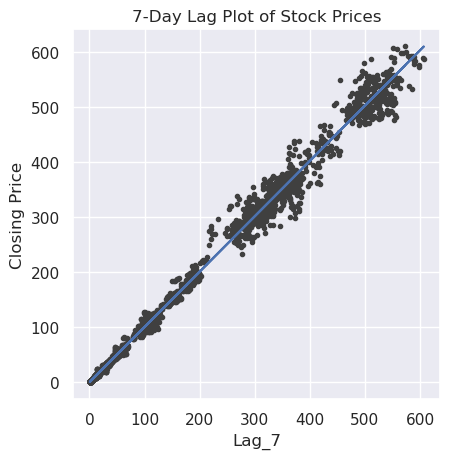

In [49]:
X = df1.loc[:, ['Lag_7']]
X.dropna(inplace=True)  # drop missing values in the feature set
y = df1.loc[:, 'Close']  # create the target
y, X = y.align(X, join='inner')  # drop corresponding values in target

linreg = LinearRegression()
linreg.fit(X, y)

pred = pd.Series(linreg.predict(X), index=X.index)

#Plots
fig, ax = plt.subplots()
ax.plot(X['Lag_7'], y, '.', color='0.25')
ax.plot(X['Lag_7'], pred)
ax.set_aspect('equal')
ax.set_ylabel('Closing Price')
ax.set_xlabel('Lag_7')
ax.set_title('7-Day Lag Plot of Stock Prices');

In [52]:
df1.reset_index(inplace=True)

### AUTO REGRESSIVE MODELS

In [53]:
import warnings # Supress warnings 
warnings.filterwarnings('ignore')

import statsmodels as sm
from statsmodels.graphics.tsaplots import plot_acf,plot_pacf
from statsmodels.tsa.stattools import adfuller
from statsmodels.tsa.ar_model import AutoReg
from statsmodels.tsa.arima_model import ARMA

# Fix seed for reproducible results
SEED = 42
np.random.seed(SEED)

# Visualizations
lag_acf = 15
lag_pacf = 15
height = 4
width = 12

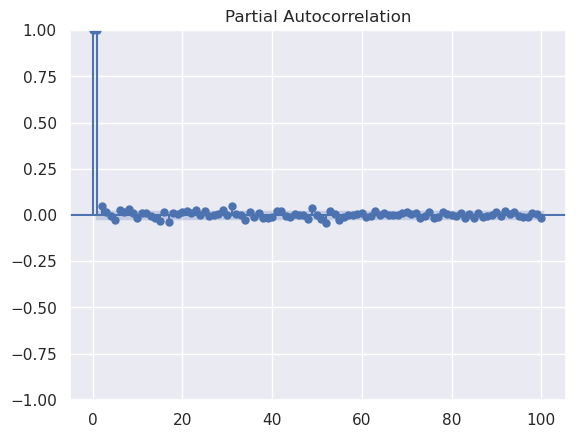

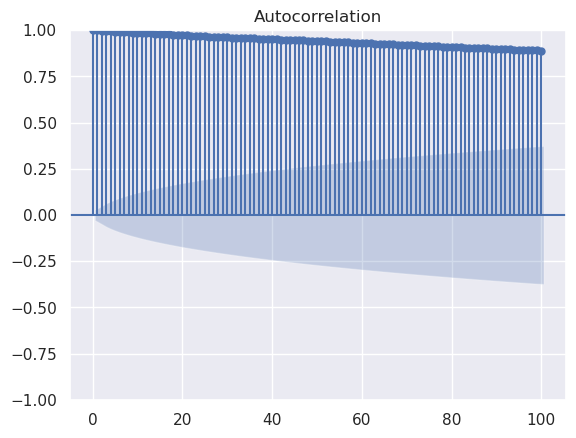

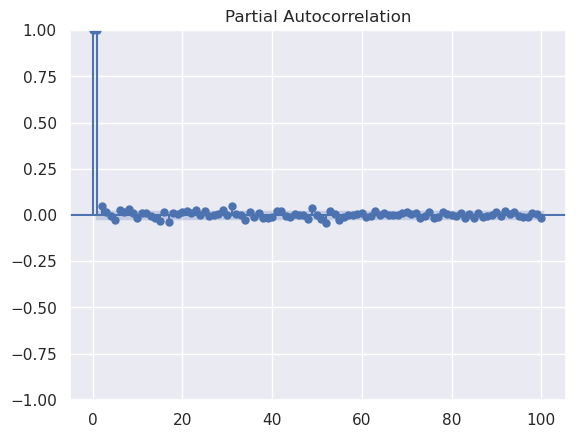

In [54]:
plot_acf(df1['Close'], lags=100)
plot_pacf(df1['Close'], lags=100)

**Observation:** The PACF plot CUTS OFF to zero abruptly whereas the ACF plot DECAYS to zero geometrically. This inidcates that the type of model to be applied is AR model.

**ADF TEST** 

The Augmented Dickey Fuller Test is used to determine the stationarity of the given time series.

NULL HYPOTHESIS: Series is non-stationary.

ALTERNATE HYPOTHESIS: Series is stationary

Significance level ALPHA = 0.05

If p-value < ALPHA, then we can reject the Null hypothesis and infer that the series is stationary.

If p-value > ALPHA, then the series is non-stationary and requires differentiation.

In [55]:
#Checking for Stationarity of series
result = adfuller(df1.Close)
print(result,'\n')
print("ADF Statistic:%f" % result[0])
print("ADF p-value:%f" % result[1])
print("Critical Values")
for key, value in result[4].items():
        print('\t%s: %.3f' % (key, value))

(2.7935460322495906, 1.0, 30, 4843, {'1%': -3.4317009744827818, '5%': -2.8621369803755154, '10%': -2.567087774109517}, 28372.6491903293) 

ADF Statistic:2.793546
ADF p-value:1.000000
Critical Values
	1%: -3.432
	5%: -2.862
	10%: -2.567


A p-value of perfect 1.0 indicates that the series is completely non-stationary.

**It can be inferred that the series has to be differentiated before applying forecasting models.**

**Identifying values of parameters p, d and q**

d value can be obtained in two ways - a) Graphically from ACF plots and b) Using pmdarima package

**GRAPHICAL METHOD**

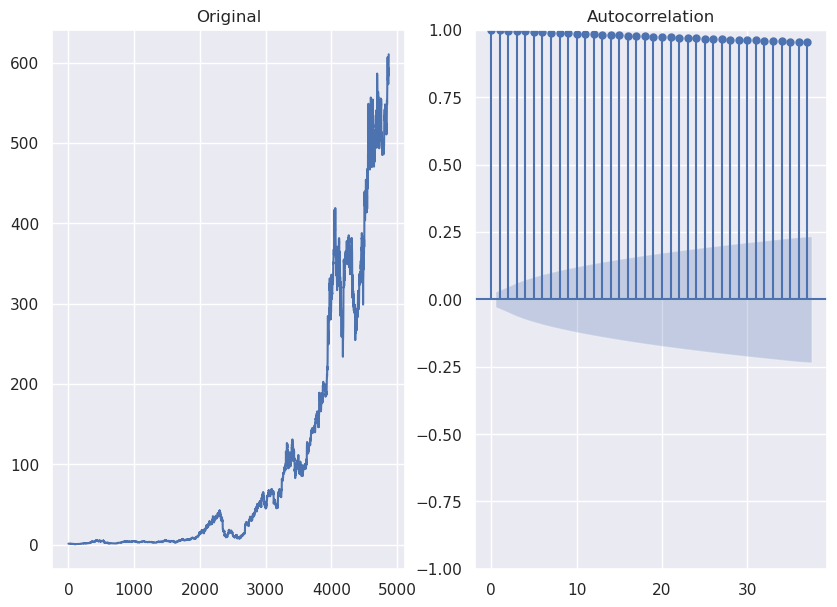

In [56]:
# Graphical method using ACF PLOTS
fig, (ax1, ax2) = plt.subplots(1,2, figsize=(10,7))
ax1.plot(df1.Close)
ax1.set_title('Original')
#Adding semicolon so that the plot is not duplicated
plot_acf(df1.Close,ax=ax2);

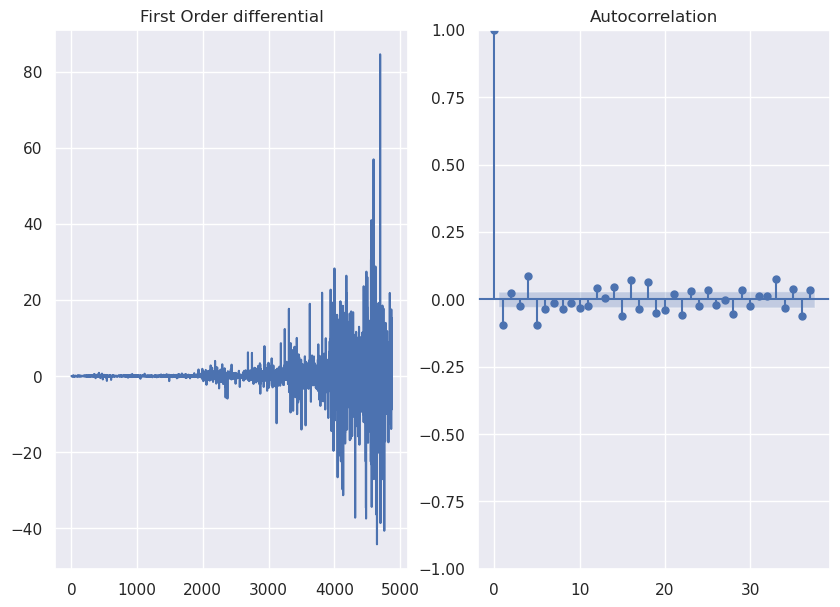

In [57]:
#Differentiation - Once
diff = df1.Close.diff().dropna()

fig, (ax1, ax2) = plt.subplots(1,2, figsize=(10,7))
ax1.plot(diff)
ax1.set_title('First Order differential')
#Adding semicolon so that the plot is not duplicated
plot_acf(diff,ax=ax2);

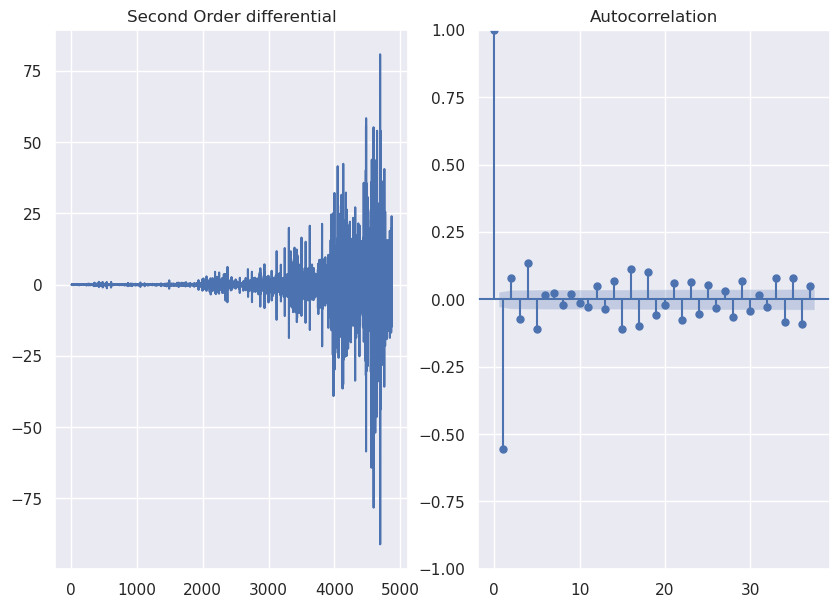

In [58]:
#Differentiation - Twice
diff = df1.Close.diff().diff().dropna()

fig, (ax1, ax2) = plt.subplots(1,2, figsize=(10,7))
ax1.plot(diff)
ax1.set_title('Second Order differential')
#Adding semicolon so that the plot is not duplicated
plot_acf(diff,ax=ax2);

**Observation:**

The Auto Correlation plot of the second order differential shows that the lag has steeped far negative in the y-axis as compared to the first order differential. 

This indicates that the series has been differentiated more than requirement.

Hence the required order of differential d is 1.

**USING pmdarima module**

In [59]:
!pip install pmdarima

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.8/1.8 MB 41.0 MB/s eta 0:00:0000:01


In [60]:
from pmdarima.arima.utils import ndiffs
ndiffs(df1.Close,test='adf')

1

The inference from the ACF plots is same as the one given by the arima module.

**Determining p**

p is the order of the AUTO REGRESSIVE term. It denotes the number of lags that are to be used as predictors.
It can be determined graphically from the PACF plots.
PACF represents the partial correlation between a series and its lags.

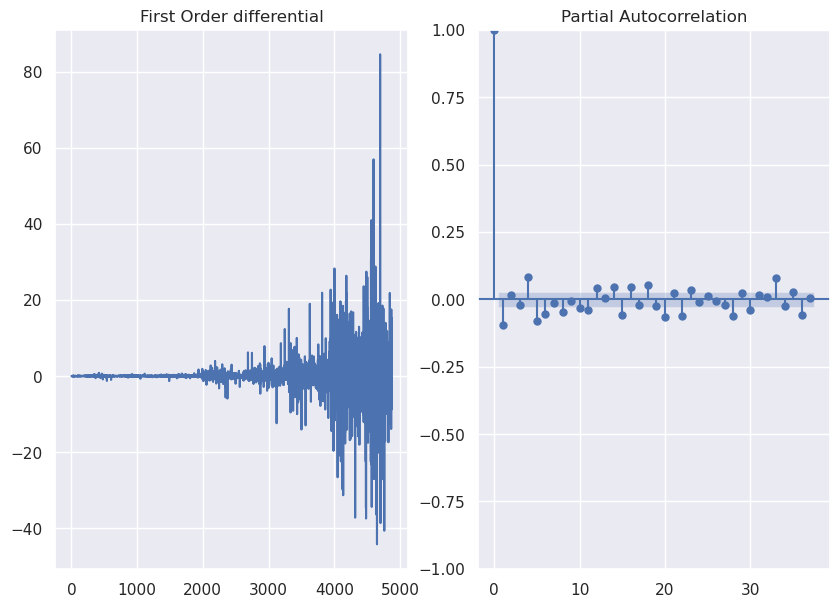

In [61]:
#Identifying p
diff = df1.Close.diff().dropna()

fig, (ax1, ax2) = plt.subplots(1,2, figsize=(10,7))
ax1.plot(diff)
ax1.set_title('First Order differential')
ax2.set_ylim(0,1)
#Adding semicolon so that the plot is not duplicated
plot_pacf(diff,ax=ax2);

Here p value can be taken to be 1 as it is well outside the significance line in the negative direction. However, the first positive p value outside the significance line is 4.
We can consider both the cases and observe the results.

**Determining q:**

q is the order of the Moving Average term. It denotes the number of lagged errors in the ARIMA model.

It can be determined from the ACF plots.

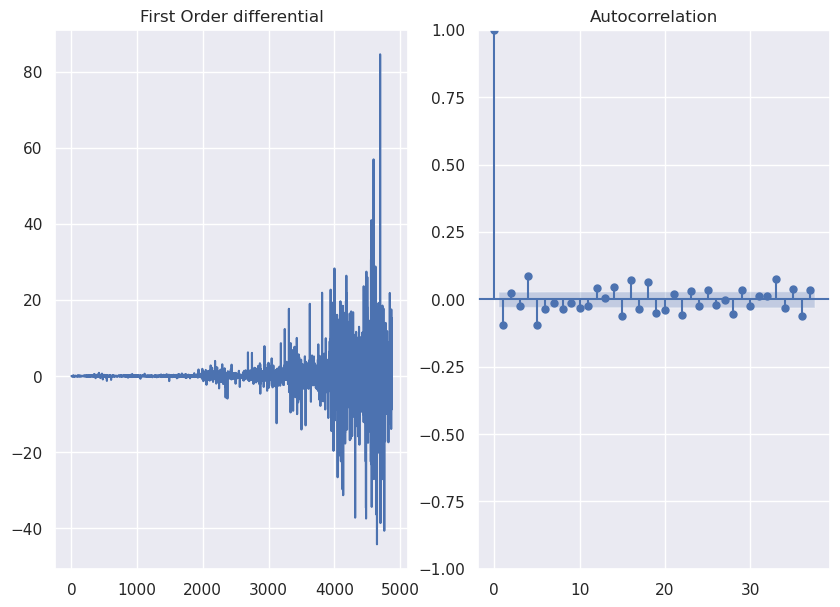

In [63]:
#Identifying q
diff = df1.Close.diff().dropna()

fig, (ax1, ax2) = plt.subplots(1,2, figsize=(10,7))
ax1.plot(diff)
ax1.set_title('First Order differential')
ax2.set_ylim(0,1)
#Adding semicolon so that the plot is not duplicated
plot_acf(diff,ax=ax2);

q value is inferred to be 1 or 4.

### AR Model

In [64]:
from statsmodels.tsa.ar_model import AutoReg
xtrain = df1['Close'].loc[:'2015-01-01']
xval = df1['Close'].loc['2015-01-01':'2018-10-01']
xtest = df1['Close'].loc['2018-10-01':]
ar_model = AutoReg(xtrain, lags=7).fit()
print(ar_model.summary())

                            AutoReg Model Results                             
Dep. Variable:                  Close   No. Observations:                 2016
Model:                     AutoReg(7)   Log Likelihood                 814.312
Method:               Conditional MLE   S.D. of innovations              0.161
Date:                Mon, 20 Mar 2023   AIC                          -1610.624
Time:                        23:23:37   BIC                          -1560.175
Sample:                             7   HQIC                         -1592.104
                                 2016                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const         -0.0096      0.007     -1.384      0.166      -0.023       0.004
Close.L1       0.9478      0.022     42.483      0.000       0.904       0.991
Close.L2       0.0596      0.031      1.944      0.0

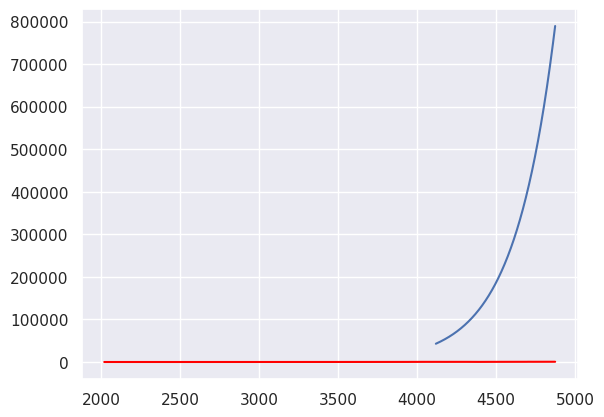

In [65]:
#Make the predictions
pred = ar_model.predict(start=df1.loc[df1['Date']=='2018-10-01'].index.values[0], end=df1.loc[df1['Date']=='2021-09-30'].index.values[0], dynamic=False)

# Plot the prediction vs test data
plt.plot(pred)
plt.plot(xtest, color='red')

From the graphs, it can be inferred that the Forecasting from using just the Auto Regressive model is far from correct. Hence there is a need for a better model

### ARIMA Model

                               SARIMAX Results                                
Dep. Variable:                  Close   No. Observations:                 4874
Model:                 ARIMA(1, 1, 1)   Log Likelihood              -14357.587
Date:                Mon, 20 Mar 2023   AIC                          28721.174
Time:                        23:24:02   BIC                          28740.648
Sample:                             0   HQIC                         28728.008
                               - 4874                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.7970      0.020    -39.335      0.000      -0.837      -0.757
ma.L1          0.7306      0.024     31.036      0.000       0.684       0.777
sigma2        21.2175      0.095    223.474      0.0

(array([1.28088721e-04, 3.52243982e-04, 3.01008494e-03, 7.14254729e-02,
        2.83396295e-03, 2.40166352e-04, 1.60110901e-05, 1.60110901e-05,
        0.00000000e+00, 1.60110901e-05]),
 array([-43.97249966, -31.15823842, -18.34397718,  -5.52971593,
          7.28454531,  20.09880655,  32.9130678 ,  45.72732904,
         58.54159028,  71.35585153,  84.17011277]),
 <BarContainer object of 10 artists>)

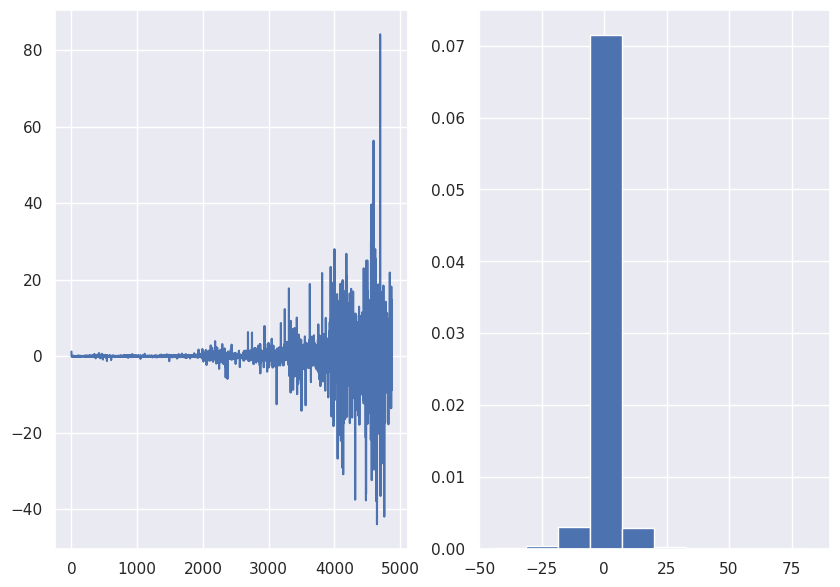

In [66]:
from statsmodels.tsa.arima.model import ARIMA

#Case 1: p = 1, q =1
arima = ARIMA(df1.Close,order=(1,1,1))
result = arima.fit()
print(result.summary())

#Plot residual errors
residuals = pd.DataFrame(result.resid)
fig, (ax1,ax2) = plt.subplots(1,2,figsize=(10,7))
ax1.plot(residuals)
ax2.hist(residuals,density=True)

                               SARIMAX Results                                
Dep. Variable:                  Close   No. Observations:                 4874
Model:                 ARIMA(1, 1, 4)   Log Likelihood              -14338.413
Date:                Mon, 20 Mar 2023   AIC                          28688.827
Time:                        23:24:10   BIC                          28727.776
Sample:                             0   HQIC                         28702.496
                               - 4874                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.4472      0.038    -11.832      0.000      -0.521      -0.373
ma.L1          0.3664      0.038      9.687      0.000       0.292       0.441
ma.L2         -0.0068      0.007     -0.935      0.3

(array([1.12280733e-04, 3.36842199e-04, 2.82305843e-03, 7.16671878e-02,
        2.93533916e-03, 2.56641675e-04, 1.60401047e-05, 1.60401047e-05,
        0.00000000e+00, 1.60401047e-05]),
 array([-44.24505239, -31.45397059, -18.66288879,  -5.87180699,
          6.91927481,  19.71035661,  32.50143841,  45.29252022,
         58.08360202,  70.87468382,  83.66576562]),
 <BarContainer object of 10 artists>)

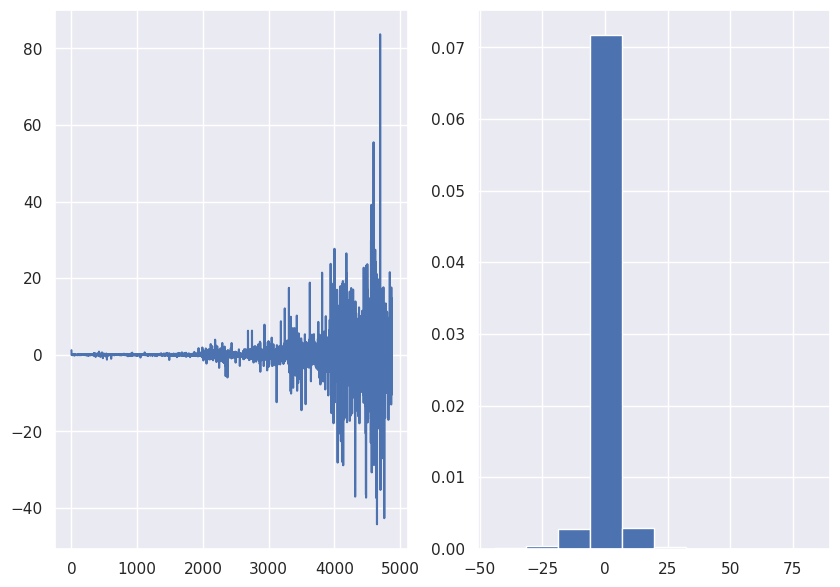

In [67]:
#Case 2: p = 1, q =4
arima = ARIMA(df1.Close,order=(1,1,4))
result = arima.fit()
print(result.summary())

#Plot residual errors
residuals = pd.DataFrame(result.resid)
fig, (ax1,ax2) = plt.subplots(1,2,figsize=(10,7))
ax1.plot(residuals)
ax2.hist(residuals,density=True)

                               SARIMAX Results                                
Dep. Variable:                  Close   No. Observations:                 4874
Model:                 ARIMA(4, 1, 1)   Log Likelihood              -14339.795
Date:                Mon, 20 Mar 2023   AIC                          28691.591
Time:                        23:24:16   BIC                          28730.540
Sample:                             0   HQIC                         28705.260
                               - 4874                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.4233      0.047     -8.938      0.000      -0.516      -0.330
ar.L2         -0.0179      0.008     -2.203      0.028      -0.034      -0.002
ar.L3         -0.0058      0.007     -0.859      0.3

(array([1.12631995e-04, 3.37895986e-04, 2.97670273e-03, 7.18592130e-02,
        2.79970960e-03, 2.89625131e-04, 1.60902850e-05, 1.60902850e-05,
        0.00000000e+00, 1.60902850e-05]),
 array([-43.91279855, -31.16160796, -18.41041736,  -5.65922677,
          7.09196382,  19.84315441,  32.59434501,  45.3455356 ,
         58.09672619,  70.84791679,  83.59910738]),
 <BarContainer object of 10 artists>)

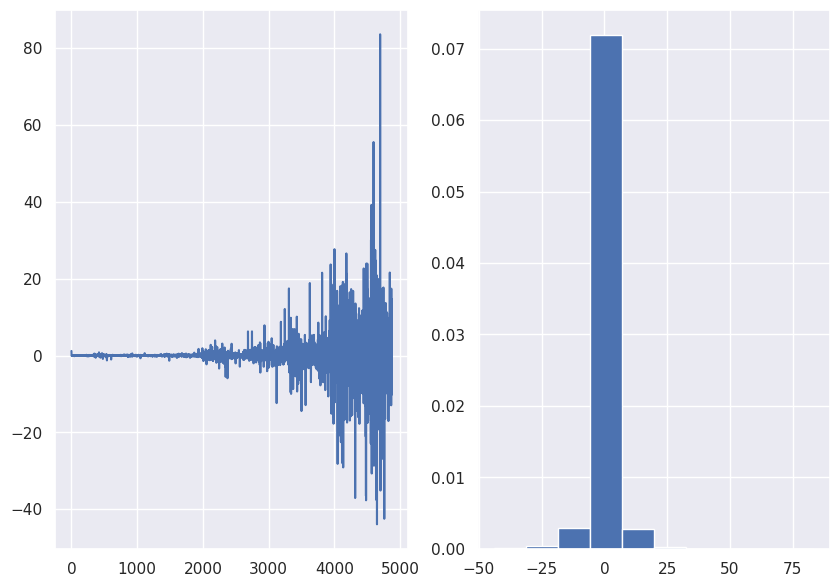

In [68]:
#Case 3: p = 4, q =1
arima = ARIMA(df1.Close,order=(4,1,1))
result = arima.fit()
print(result.summary())

#Plot residual errors
residuals = pd.DataFrame(result.resid)
fig, (ax1,ax2) = plt.subplots(1,2,figsize=(10,7))
ax1.plot(residuals)
ax2.hist(residuals,density=True)

                               SARIMAX Results                                
Dep. Variable:                  Close   No. Observations:                 4874
Model:                 ARIMA(4, 1, 4)   Log Likelihood              -14327.417
Date:                Mon, 20 Mar 2023   AIC                          28672.834
Time:                        23:24:24   BIC                          28731.257
Sample:                             0   HQIC                         28693.337
                               - 4874                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.9688      0.046    -21.041      0.000      -1.059      -0.879
ar.L2         -0.1332      0.055     -2.426      0.015      -0.241      -0.026
ar.L3          0.8361      0.048     17.299      0.0

(array([1.47550700e-04, 3.44284966e-04, 3.18053730e-03, 7.28736511e-02,
        3.08217017e-03, 2.29523311e-04, 1.63945222e-05, 1.63945222e-05,
        0.00000000e+00, 1.63945222e-05]),
 array([-42.97848292, -30.46391928, -17.94935563,  -5.43479199,
          7.07977166,  19.59433531,  32.10889895,  44.6234626 ,
         57.13802625,  69.65258989,  82.16715354]),
 <BarContainer object of 10 artists>)

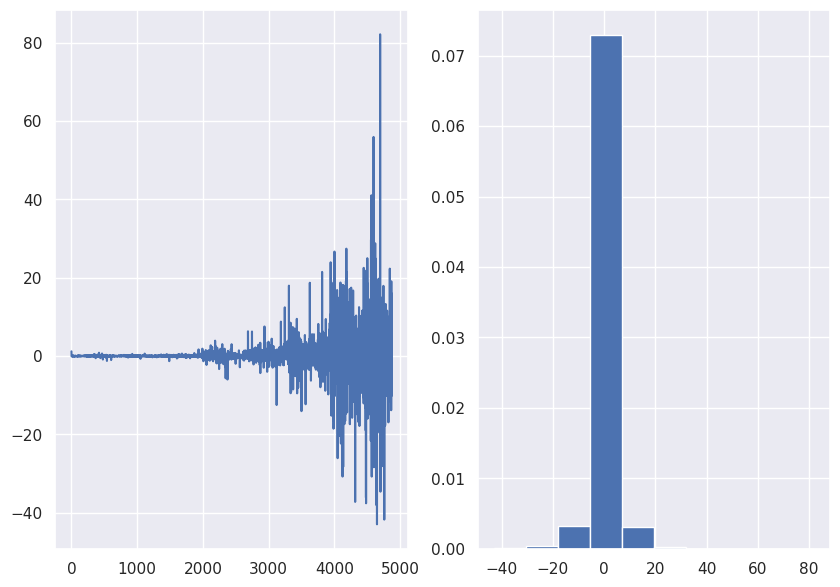

In [69]:
#Case 4: p = 4, q =4
arima = ARIMA(df1.Close,order=(4,1,4))
result = arima.fit()
print(result.summary())

#Plot residual errors
residuals = pd.DataFrame(result.resid)
fig, (ax1,ax2) = plt.subplots(1,2,figsize=(10,7))
ax1.plot(residuals)
ax2.hist(residuals,density=True)

The ARIMA model with parameters p=4 and q=4 are ideal for this case as they have lowest AIC values

In [70]:
#STATIC FORECASTING
pred = result.get_prediction(start=4374, dynamic=False)
pred_ci = pred.conf_int()

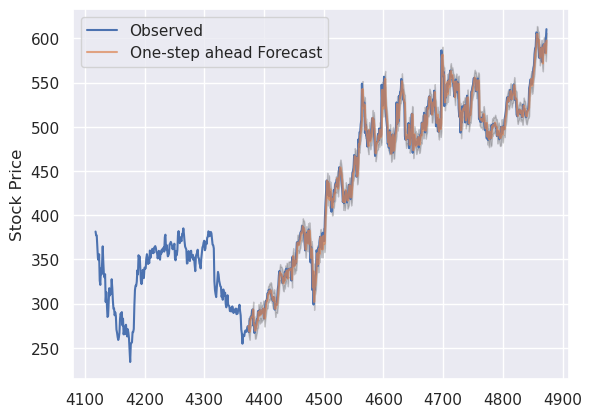

In [71]:
ax = df1['Close'].loc[df1.Date>='2018-10-01'].plot(label='Observed')
pred.predicted_mean.plot(ax=ax, label='One-step ahead Forecast', alpha=.7)

ax.fill_between(pred_ci.index,pred_ci.iloc[:, 0], pred_ci.iloc[:, 1], color='k', alpha=.2)
ax.set_ylabel('Stock Price')
plt.legend()

plt.show()

In [72]:
#MEAN SQUARED ERROR
from sklearn.metrics import mean_squared_error
from math import sqrt
yf = pred.predicted_mean
ya = df1['Close'].iloc[4374:]

# Compute the mean square error
mse = mean_squared_error(ya,yf)
print('The Mean Squared Error of our forecasts is {}'.format(round(mse, 2)))
print('The Root Mean Squared Error of our forecasts is {}'.format(round(sqrt(mse), 2)))

The Mean Squared Error of our forecasts is 124.42
The Root Mean Squared Error of our forecasts is 11.15


In [73]:
#DYNAMIC FORECASTING
pred_dynamic = result.get_prediction(start=4374, dynamic=True, full_results=True)
pred_dynamic_ci = pred_dynamic.conf_int()

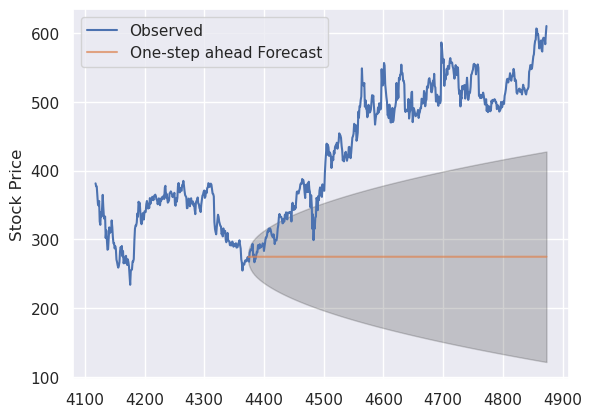

In [74]:
ax = df1['Close'].loc[df1.Date>='2018-10-01'].plot(label='Observed')
pred_dynamic.predicted_mean.plot(ax=ax, label='One-step ahead Forecast', alpha=.7)

ax.fill_between(pred_dynamic_ci.index,pred_dynamic_ci.iloc[:, 0], pred_dynamic_ci.iloc[:, 1], color='k', alpha=.2)
ax.set_ylabel('Stock Price')
plt.legend()

plt.show()

In [75]:
#MEAN SQUARED ERROR
from sklearn.metrics import mean_squared_error
from math import sqrt
ydf = pred_dynamic.predicted_mean
ya = df1['Close'].iloc[4374:]

# Compute the mean square error
mse = mean_squared_error(ya,ydf)
print('The Mean Squared Error of our forecasts is {}'.format(round(mse, 2)))
print('The Root Mean Squared Error of our forecasts is {}'.format(round(sqrt(mse), 2)))

The Mean Squared Error of our forecasts is 42284.28
The Root Mean Squared Error of our forecasts is 205.63


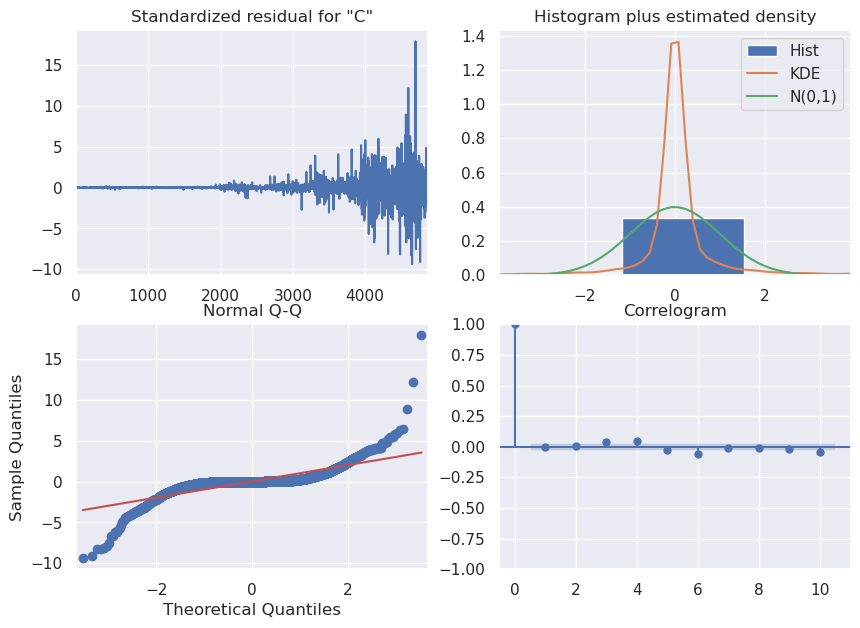

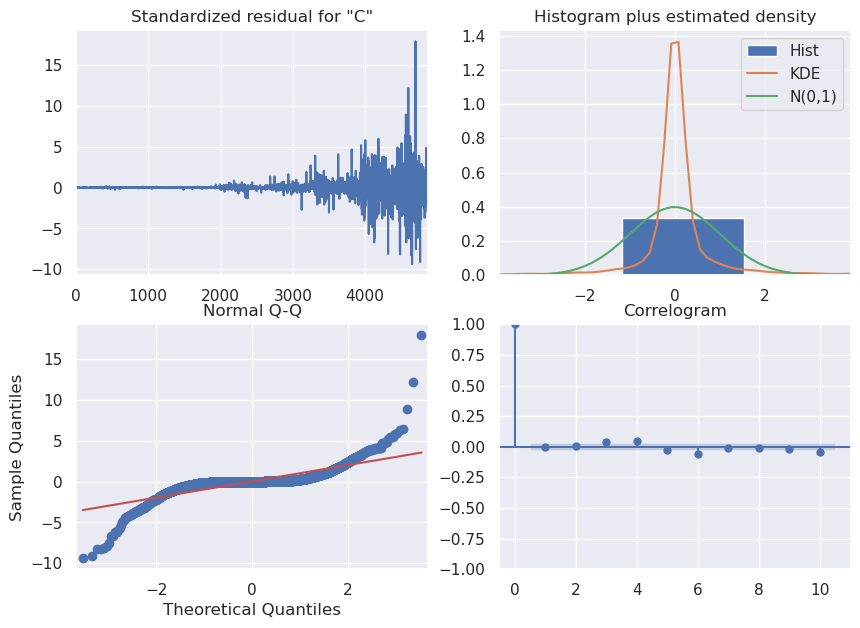

In [76]:
result.plot_diagnostics(figsize=(10,7))

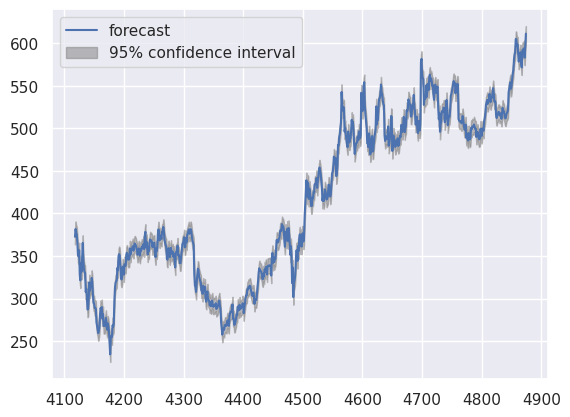

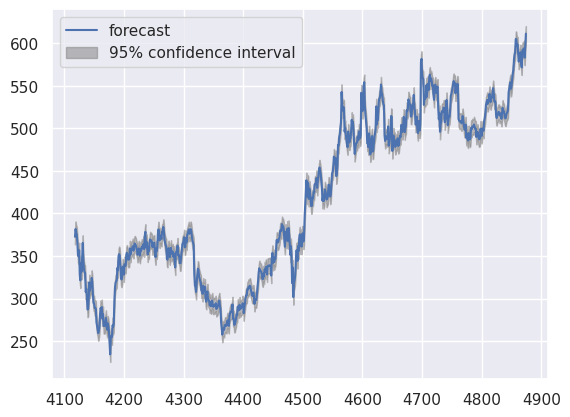

In [77]:
#Static Forecasting
from statsmodels.graphics.tsaplots import plot_predict
plot_predict(result,start=4118, end=4874, dynamic=False)

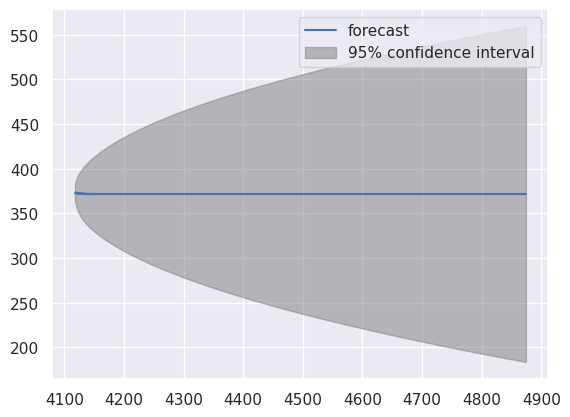

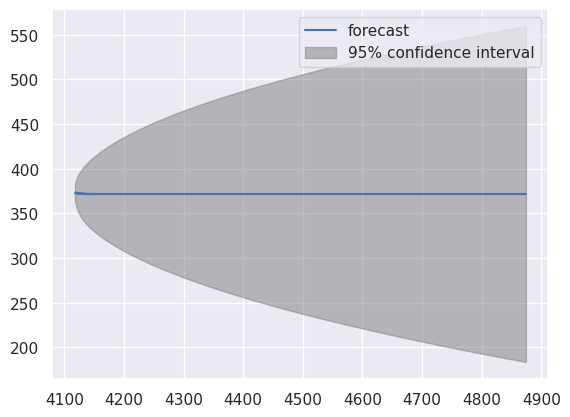

In [78]:
#Dyanmic Forecasting
from statsmodels.graphics.tsaplots import plot_predict
plot_predict(result,start=4118, end=4874, dynamic=True)

**MODULE 3: SUPERVISED REGRESSION MODEL - XGBOOST**

In [90]:
from xgboost import XGBRegressor as xg
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error as MSE
df2 = df1[['Close']].copy()

In [91]:
df2['target'] = df2.Close.shift(-1)

**Test Train Split**

In [92]:
def train_test_split(data, per):
    data = data.values
    n = int(int(len(data)) * (1-per))
    return data[:n], data[n:]

In [93]:
train, test = train_test_split(df2,0.2)

**Training & Prediction**

In [102]:
def xgb_predict(train, val):
    train = np.array(train)
    x, y = train[:,:-1], train[:,-1]
    model = xg(objective='reg:squarederror',n_estimators=1000)
    model.fit(X,Y)
    
    val = np.array(val).reshape(1,-1)
    ypred = model.predict(val)
    return ypred[0]

In [103]:
xgb_predict(train, test[729,0])

199.46484

**Walk Forward Validation**

In [112]:
def validate(data, per):
    pred = []
    train, test = train_test_split(data, per)
    hist = [i for i in train]
    for j in range(len(test)):
        test_x, test_y = test[:,:-1], test[:, -1]
        pr = xgb_predict(hist,test_x[0])
        pred.append(pr)
        hist.append(test[j])
    
    error = MSE(test[:,-1],pred, squared=False)
    return error, test[:,-1], pred

In [ ]:
rmse, y, predictions = validate(df2,0.2)
print("Root Mean Squared Error is", rmse)